# Development notebook. No experiments or results here. For dev purposes




In [6]:
run init.ipynb

[autoreload of experiments failed: Traceback (most recent call last):
  File "/Users/samperochon/anaconda3/envs/combinations/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/samperochon/anaconda3/envs/combinations/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/samperochon/anaconda3/envs/combinations/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/samperochon/anaconda3/envs/combinations/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..src/experiments.py", line 20, in <module>
    from utils import fi, __rep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [ ]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

verbosity=0

print("Doing experimeents with the following set of parameters:")
print("NUM_SAMPLES = {}".format(NUM_SAMPLES))
print("IMBALANCE_RATIO = {}".format(IMBALANCE_RATIO))
print("MISSINGNESS_PATTERN = {}".format(MISSINGNESS_PATTERN))
print("RATIO_OF_MISSING_VALUES = {}".format(RATIO_OF_MISSING_VALUES))
print("RESOLUTION = {}".format(RESOLUTION))
print("BANDWIDTH = {}\n\n".format(BANDWIDTH))

df = create_df()

display(df.head())
for dataset_name in ['circles', 'moons']:
    for ratio_of_missing_values in [.05, .1, .3, .4, .5, .6, .7, .8, .9]:
        for imbalance_ratio in [.1, .15, .3, .45]:
                for missingness_pattern in [1, 2, 3, 4, 5]:

                    
                    if not len(df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :

                        print("Experiment on {} - ratio missing (mumber-wise) - imbalance: {} - missingness patterns {}".format(dataset_name, ratio_of_missing_values, imbalance_ratio, missingness_pattern))

                        start_time = time()
                        try:

                            # Definition of the Train and Test datasets
                            dataset_train = DatasetGenerator(dataset_name=dataset_name, 
                                                            purpose='train',
                                                            num_samples=int(proportion_train*num_samples), 
                                                            imbalance_ratio=imbalance_ratio, 
                                                            verbosity=0)

                            dataset_test = DatasetGenerator(dataset_name=dataset_name, 
                                                            purpose='test',
                                                            num_samples=int((1-proportion_train)*num_samples), 
                                                            imbalance_ratio=imbalance_ratio, 
                                                            verbosity=0)


                            # Creation of the missingness
                            dataset_train.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)
                            dataset_test.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)

                            # Create the experiments
                            exp = Experiments(dataset_name, 
                                              dataset_train=dataset_train, 
                                              dataset_test=dataset_test, 
                                              previous_experiment=None, 
                                              save_experiment=True, 
                                              verbosity=1, 
                                              debug=False, 
                                              proportion_train=PROPORTION_TRAIN, 
                                              resolution=RESOLUTION, 
                                              bandwidth=BANDWIDTH,
                                              random_state=RANDOM_STATE)


                            # Estimate the distributions 
                            exp.fit()

                            # Estimate the distributions 
                            exp.predict()

                            # Plot results
                            #exp.plot()
                        except:
                            print(dataset_name, ratio_of_missing_values, imbalance_ratio, missingness_pattern)

                        end_time = time()

                        hours, rest = divmod(end_time - start_time, 3600)
                        minutes, seconds = divmod(rest, 60)
                        print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))

In [5]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

verbosity=0

print("Doing experimeents with the following set of parameters:")
print("NUM_SAMPLES = {}".format(NUM_SAMPLES))
print("IMBALANCE_RATIO = {}".format(IMBALANCE_RATIO))
print("MISSINGNESS_PATTERN = {}".format(MISSINGNESS_PATTERN))
print("RATIO_OF_MISSING_VALUES = {}".format(RATIO_OF_MISSING_VALUES))
print("RESOLUTION = {}".format(RESOLUTION))
print("BANDWIDTH = {}\n\n".format(BANDWIDTH))

df = create_df()

display(df.head())
for dataset_name in ['circles', 'moons']:
    for missingness_pattern in [1]:
        for ratio_of_missing_values in np.linspace(0, 1, 100):#[.05, .1, .3, .4, .5, .6, .7, .8, .9]:
            #for imbalance_ratio in [.1, .15, .3, .45]:
                


            if not len(df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :

                print("Experiment on {} - ratio missing (mumber-wise) {} - imbalance: {} - missingness patterns {}".format(dataset_name, ratio_of_missing_values, imbalance_ratio, missingness_pattern))

                start_time = time()
                try:

                    # Definition of the Train and Test datasets
                    dataset_train = DatasetGenerator(dataset_name=dataset_name, 
                                                    purpose='train',
                                                    num_samples=int(proportion_train*num_samples), 
                                                    imbalance_ratio=imbalance_ratio, 
                                                    verbosity=0)

                    dataset_test = DatasetGenerator(dataset_name=dataset_name, 
                                                    purpose='test',
                                                    num_samples=int((1-proportion_train)*num_samples), 
                                                    imbalance_ratio=imbalance_ratio, 
                                                    verbosity=0)


                    # Creation of the missingness
                    dataset_train.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)
                    dataset_test.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)

                    # Create the experiments
                    exp = Experiments(dataset_name, 
                                      dataset_train=dataset_train, 
                                      dataset_test=dataset_test, 
                                      previous_experiment=None, 
                                      save_experiment=True, 
                                      verbosity=1, 
                                      debug=False, 
                                      proportion_train=PROPORTION_TRAIN, 
                                      resolution=RESOLUTION, 
                                      bandwidth=BANDWIDTH,
                                      random_state=RANDOM_STATE)


                    # Estimate the distributions 
                    exp.fit()

                    # Estimate the distributions 
                    exp.predict()

                    # Plot results
                    #exp.plot()
                except:
                    print(dataset_name, ratio_of_missing_values, imbalance_ratio, missingness_pattern)

                end_time = time()

                hours, rest = divmod(end_time - start_time, 3600)
                minutes, seconds = divmod(rest, 60)
                print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))

Doing experimeents with the following set of parameters:
NUM_SAMPLES = 10000
IMBALANCE_RATIO = 0.5
MISSINGNESS_PATTERN = 3
RATIO_OF_MISSING_VALUES = 0.2
RESOLUTION = 50
BANDWIDTH = 0.2




,dataset_name,experiment_number,purpose,fitted,num_samples,imbalance_ratio,missingness_pattern,missingness_mechanism,ratio_of_missing_values,missing_X1,missing_X2,missing_first_quarter,ratio_missing_per_class_0,ratio_missing_per_class_1,Accuracy,F1,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR,resolution,bandwidth,estimation_time_0,estimation_time_1
0,moons,61,classification,True,1999,0.40,1,MCAR,0.2,True,False,None,NaN,NaN,0.364,0.311,-0.268,0.358,0.369,0.274,0.274,0.463,0.642,0.726,0.537,50,0.2,141.416640,94.159811
1,moons,95,classification,True,1999,0.40,5,MNAR,None,True,True,True,0.1,0.3,0.271,0.197,-0.464,0.224,0.303,0.176,0.176,0.369,0.776,0.824,0.631,50,0.2,136.556918,90.257059
2,moons,132,classification,True,1999,0.50,1,MCAR,0.2,True,False,None,NaN,NaN,0.354,0.355,-0.291,0.355,0.353,0.355,0.355,0.354,0.645,0.645,0.646,50,0.2,119.502085,120.147231
3,moons,59,classification,True,1999,0.25,4,MNAR,None,True,True,False,0.1,0.3,0.369,0.282,-0.159,0.495,0.328,0.197,0.197,0.661,0.505,0.803,0.339,50,0.2,174.194360,52.078643
4,moons,92,classification,True,1999,0.40,2,MAR,0.2,True,True,True,NaN,NaN,0.285,0.183,-0.450,0.200,0.341,0.168,0.168,0.390,0.800,0.832,0.610,50,0.2,116.646653,89.467214


Experiment on circles - ratio missing (mumber-wise) 0.0 - imbalance: 0.5 - missingness patterns 1
Doing experiment 213!
circles 0.0 0.5 1
Done (0h 1m and 42.85s).

Experiment on circles - ratio missing (mumber-wise) 0.010101010101010102 - imbalance: 0.5 - missingness patterns 1
Doing experiment 214!
circles 0.010101010101010102 0.5 1
Done (0h 1m and 42.99s).

Experiment on circles - ratio missing (mumber-wise) 0.020202020202020204 - imbalance: 0.5 - missingness patterns 1
Doing experiment 215!
circles 0.020202020202020204 0.5 1
Done (0h 1m and 42.47s).

Experiment on circles - ratio missing (mumber-wise) 0.030303030303030304 - imbalance: 0.5 - missingness patterns 1
Doing experiment 216!
circles 0.030303030303030304 0.5 1
Done (0h 1m and 42.56s).

Experiment on circles - ratio missing (mumber-wise) 0.04040404040404041 - imbalance: 0.5 - missingness patterns 1
Doing experiment 217!
circles 0.04040404040404041 0.5 1
Done (0h 1m and 42.78s).

Experiment on circles - ratio missing (mumber-

# Dev missingness patterns

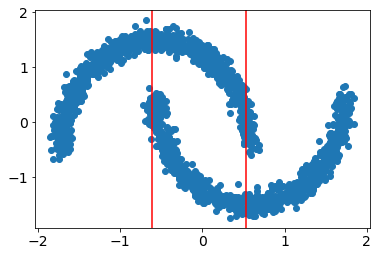

In [80]:
experiment.dataset.X_gt[(experiment.dataset.y_gt==1).squeeze()].mean(axis=0)

plt.scatter(experiment.dataset.X_gt[:,0], experiment.dataset.X_gt[:,1])
plt.axvline(experiment.dataset.X_gt[(experiment.dataset.y_gt==1).squeeze()].mean(axis=0)[0], color='r')
plt.axvline(experiment.dataset.X_gt[(experiment.dataset.y_gt==0).squeeze()].mean(axis=0)[0], color='r')

## Debug missingness stats

In [15]:
num_samples=10000
resolution=50
ratio_of_missing_values = RATIO_OF_MISSING_VALUES
imbalance_ratio = IMBALANCE_RATIO
methods=["side_spaces"]
dataset_name = 'circles'
h = .2


# Create an expe
experiment = Experiment(dataset_name=dataset_name, 
                        num_samples=num_samples, 
                        ratio_of_missing_values=ratio_of_missing_values, 
                        imbalance_ratio=imbalance_ratio, 
                        create_experiment=False,
                        verbosity=1, 
                        debug=False, 
                        random_state=47)

# There are no mutual information between Z and X, Y
experiment.dataset.generate_missing_coordinates(missingness_pattern=1)

# There are mutual information between Z and X (if X_1=0 then Z_2=1 and vice-versa), but not between Z and Y
experiment.dataset.generate_missing_coordinates(missingness_pattern=2)

# There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), but not between Z and Y
experiment.dataset.generate_missing_coordinates(missingness_pattern=3)

# There are no mutual information between Z and X, but there are between Z and Y (one class has higher rate of missing value)
experiment.dataset.generate_missing_coordinates(missingness_pattern=4)

# There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), and between Z and Y (one class has higher rate of missing value)
experiment.dataset.generate_missing_coordinates(missingness_pattern=5)


missingness_pattern=5
self = experiment.dataset

from copy import deepcopy

In [16]:
if missingness_pattern is not None:
    self._retrieve_missingness_parameters(missingness_pattern)

else:
    self.missingness_parameters =   {'missingness_mechanism' : missingness_mechanism, 
                                    'ratio_of_missing_values' : ratio_of_missing_values,
                                    'missing_X1' : missing_X1,
                                    'missing_X2' : missing_X2,
                                    'missing_first_quarter' : missing_first_quarter,
                                    'ratio_missing_per_class' : ratio_missing_per_class}  

print(self.missingness_parameters)


self.X = deepcopy(self.X_raw)

excedded_time = 0

{'missingness_mechanism': 'MNAR', 'ratio_of_missing_values': None, 'missing_X1': True, 'missing_X2': True, 'missing_first_quarter': True, 'ratio_missing_per_class': [0.1, 0.3]}


In [17]:
self.met_missingness_rate(verbose=1)

Class 0 - Ratio of number-wise missing data 0.00000 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.00000 (thres. 0.3)


False

In [19]:
if self.missingness_parameters['missing_first_quarter']:

    # Making sure that the total amount of missing coordinate does not exceed the threshold
    while not self.met_missingness_rate(label=0, verbose=1) and not self.met_missingness_rate(label=1,verbose=1) and excedded_time < MAX_TRY_MISSSINGNESS:
        for label in [0, 1]:

            # Simulate missing samples
            for i in range(self.X.shape[0]):  # randomly remove features

                if self.y[i]==label and self.X_raw[i,0] > 0 and self.X_raw[i,1] > 0:

                    if self.missingness_parameters['missing_X1'] and np.random.random() < self.missingness_parameters['ratio_missing_per_class'][label]:
                        # equal probability
                        self.X[i,0] = np.nan

                    if self.missingness_parameters['missing_X2'] and np.random.random() < self.missingness_parameters['ratio_missing_per_class'][label]:
                        self.X[i,1] = np.nan     

                if self.met_missingness_rate(label=label): 
                    break
        excedded_time+=1

Class 0 - Ratio of number-wise missing data 0.00000 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.00000 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.00000 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.00000 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.02500 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.07620 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.02500 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.07620 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.04790 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.13070 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.04790 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.13070 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.06670 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.16690 (thres. 0.3)
Class 0 - Ratio of number-wise missing data 0.06670 (thres. 0.1)
Class 1 - Ratio of number

KeyboardInterrupt: 

1000 samples created


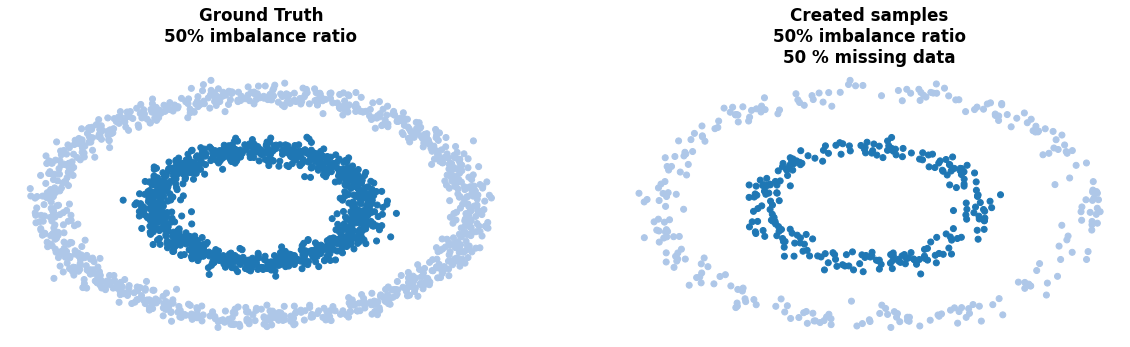

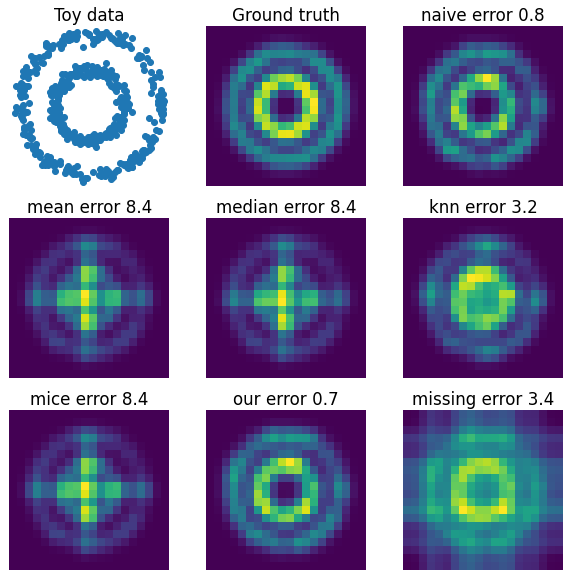

In [14]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.5,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2)

1000 samples created


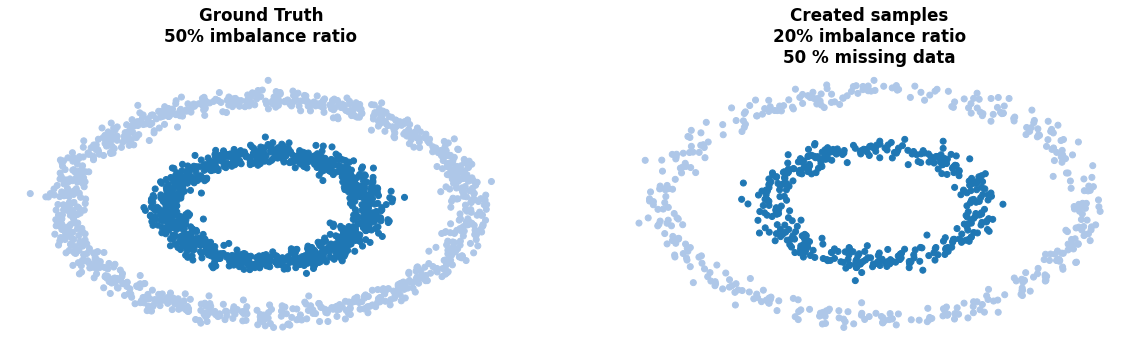

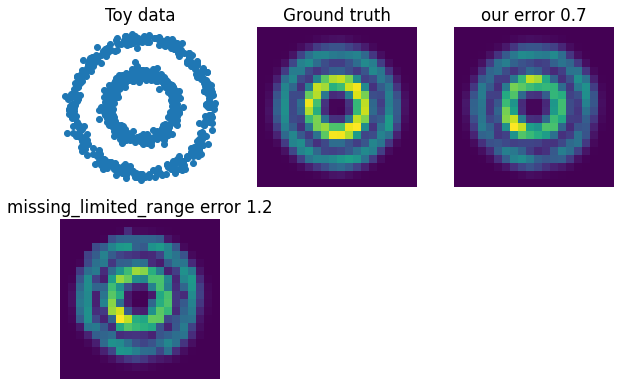

In [169]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

**Here we increase the resolution of the feature space from `20` to `50`.**


**Conclusion:**

    * Although increasing the resolution goes towards reducing the phenomenom 

1000 samples created


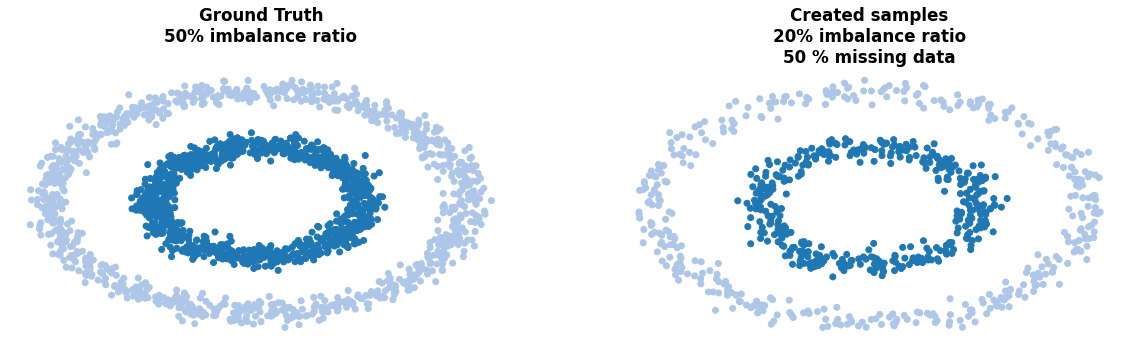

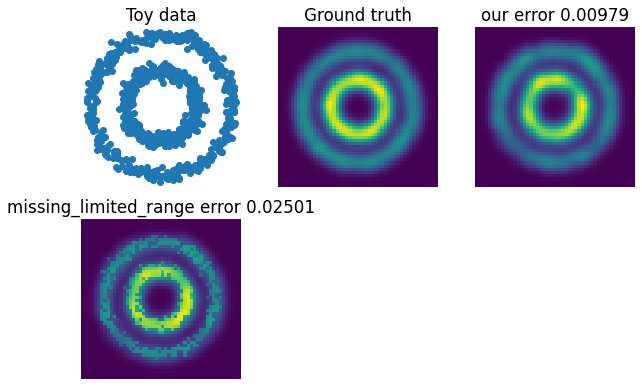

In [174]:
from utils import compare_imputation_methods

dataset_names = ['circles']#'moons'
for dataset in dataset_names:
    compare_imputation_methods(dataset=dataset, 
                               num_samples=1000, 
                               ratio_of_missing_values=.2,
                               imbalance_ratio=.5,
                               kernel_bandwidth=.2, 
                               resolution=50,
                               methods=['our', "missing_limited_range"])

<AxesSubplot:>

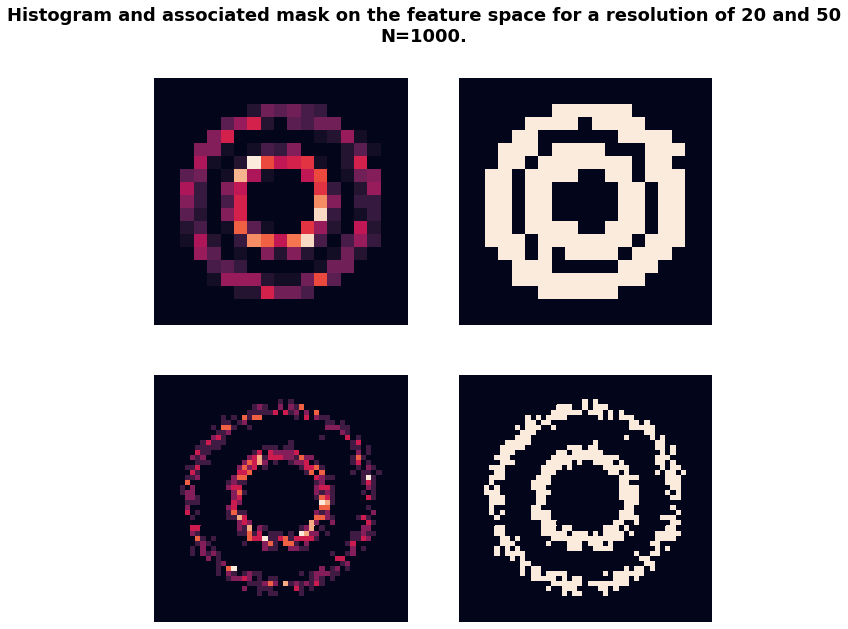

In [193]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=1000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=1000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

<AxesSubplot:>

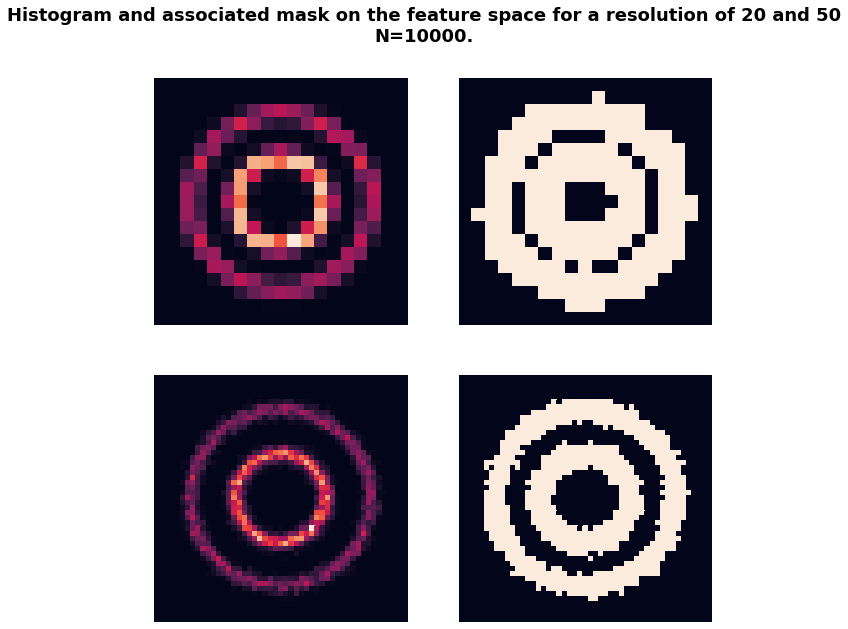

In [194]:
# (1) Create toy and ground truth data
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                              num_samples=10000, 
                              ratio_of_missing_values=ratio_of_missing_values, 
                              imbalance_ratio=imbalance_ratio,
                              provide_labels=True, 
                              verbose=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10)); axes = axes.flatten()
fig.suptitle("Histogram and associated mask on the feature space for a resolution of 20 and 50\nN=10000.", weight='bold', fontsize=18);[ax.axis('off') for ax in axes] 
resolution = 20
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[0], cbar=False); sns.heatmap(hist2d>0, ax=axes[1], cbar=False)
resolution = 50
m = [not np.isnan(np.sum(X[i,:])) for i in range(X.shape[0])]; X_prior = X[m,:]; W = np.linspace(-2.5,2.5,resolution).shape[0]
hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
sns.heatmap(hist2d, ax=axes[2], cbar=False); sns.heatmap(hist2d>0, ax=axes[3], cbar=False)

#### Functions

In [191]:
xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f = np.zeros_like(xygrid[0])  # init. the pdf estimation

if method=='missing_limited_range':
    # See documentation
    from stats import kernel_based_pdf_estimation_z_prior_limited_range
    h = bandwidth

    # Compute the space mask to be sure not to add contribution on expty space, based on the resolution of the space
    m = [not np.isnan(np.sum(data[i,:])) for i in range(data.shape[0])]
    X_prior = data[m,:]
    hist2d, _, _ = np.histogram2d(X_prior[:,0], X_prior[:,1], bins=[np.linspace(-2.5,2.5,resolution), np.linspace(-2.5,2.5,resolution)])
    hist2d_up = np.concatenate([np.concatenate([hist2d, np.zeros((1, W-1))], axis=0), np.zeros((H, 1))], axis=1)
    mask_space = hist2d_up>0
    for i in range(H):
        for j in range(W):
            x = xygrid[0][i,j]
            y = xygrid[1][i,j]
            hat_f[i,j] = kernel_based_pdf_estimation_z_prior_limited_range(data,x=[x,y], put_weight=mask_space[i,j], h=h)  

##############################################################################
####### Kernel_based_pdf_estimation_with_missing_priors_limited_range#########
##############################################################################

def kernel_based_pdf_estimation_z_prior_limited_range(X, x=None, h=.2, put_weight=1, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    # Computation of the missingness priors: [P(Z_1 = 1), ... ,  P(Z_K = 1)]
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])
    hat_f = F_z_prior_limited_range(X=X, Z_prior=Z_prior, put_weight=put_weight, x=x, h=h)
    return hat_f


#@jit(nopython=True, parallel=True)
def F_z_prior_limited_range(X=None, Z_prior=None, x=None, put_weight=0,  h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        hat_f.append(f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h))
    hat_f = np.mean(np.array(hat_f))         
    return hat_f

#@jit(nopython=True, parallel=True)
def f_xi_z_prior_limited_range(X_i, x, Z_prior, put_weight, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = Z_prior.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )

        if coords_missing[j]:  # we don't know the j-th coordinate, 
            if put_weight: # We put weight only if this part of the space is explored by the distribution.
                # We use prior on the missingness mechanism associated to this coordinates.
                hat_fi *= Z_prior[j]
            else:
                hat_fi *= 0
    return hat_fi

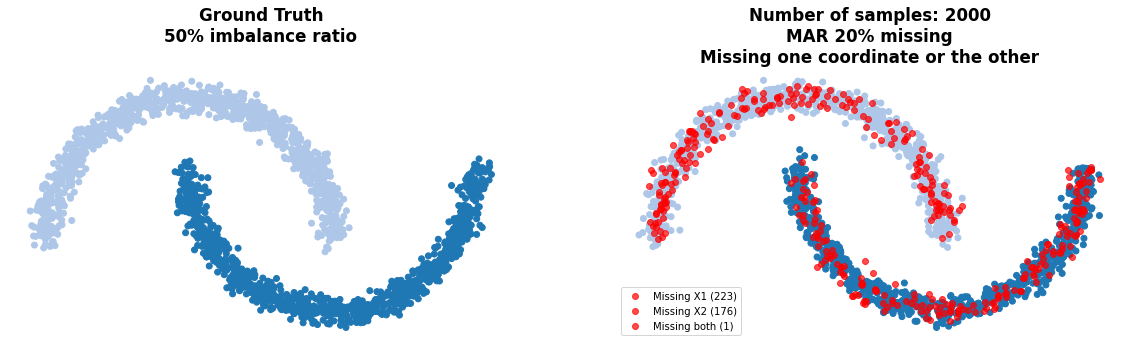

In [109]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='moons', 
                           num_samples=2000, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

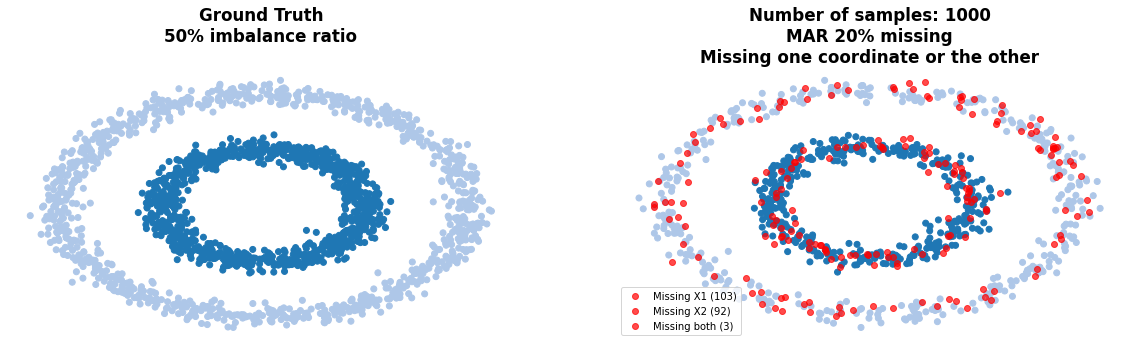

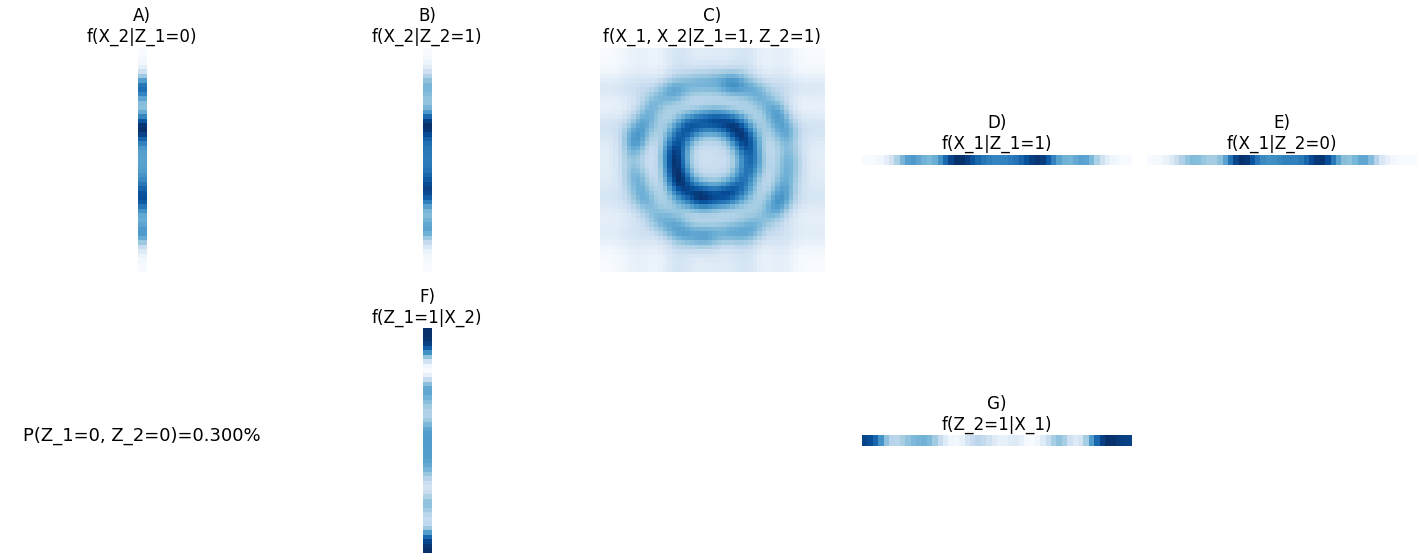

In [ ]:
num_samples=1000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=20
methods=["side_spaces"]
dataset = 'circles'

h = .2

# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='circles', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_2_marginal, hat_f_1_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=50, verbose=1)

0.0842613350467886

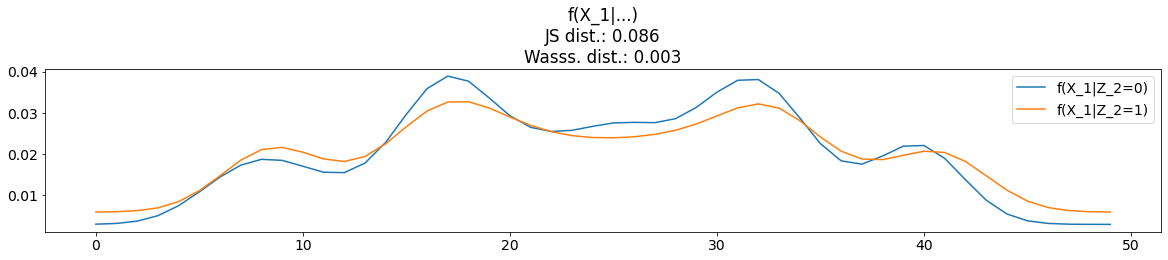

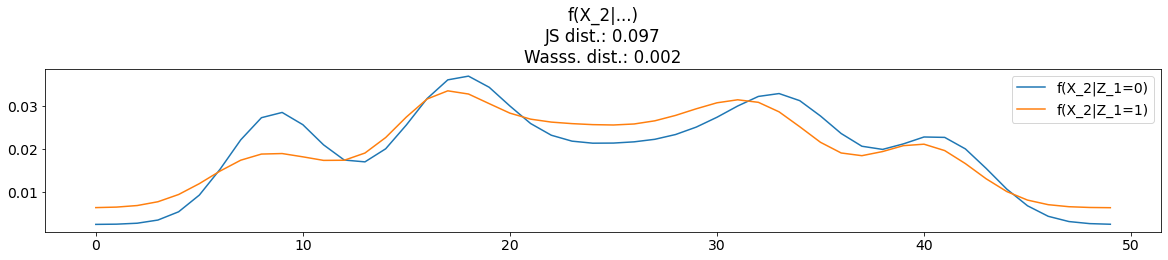

In [148]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance


fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

In [189]:
num_samples=20000
ratio_of_missing_values=.2
imbalance_ratio=.5
resolution=50
methods=["side_spaces"]
dataset = 'circles'

h = .2

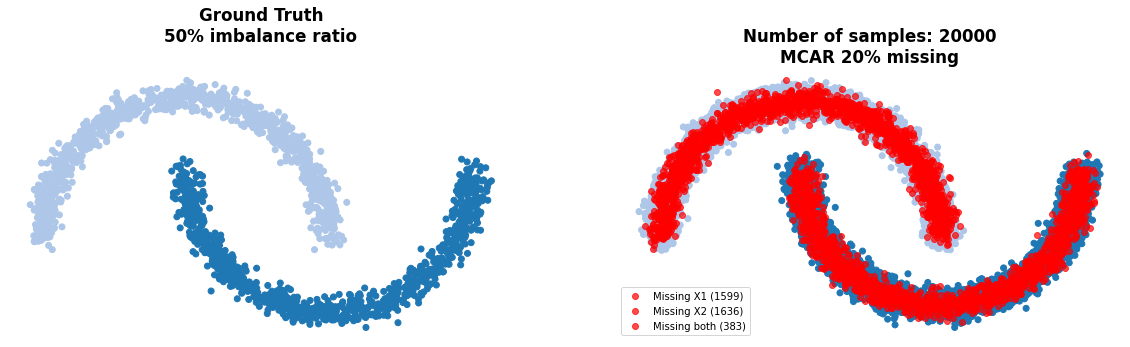

In [190]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='moons', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MCAR', allow_missing_both_coordinates=False, missing_first_quarter=False, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

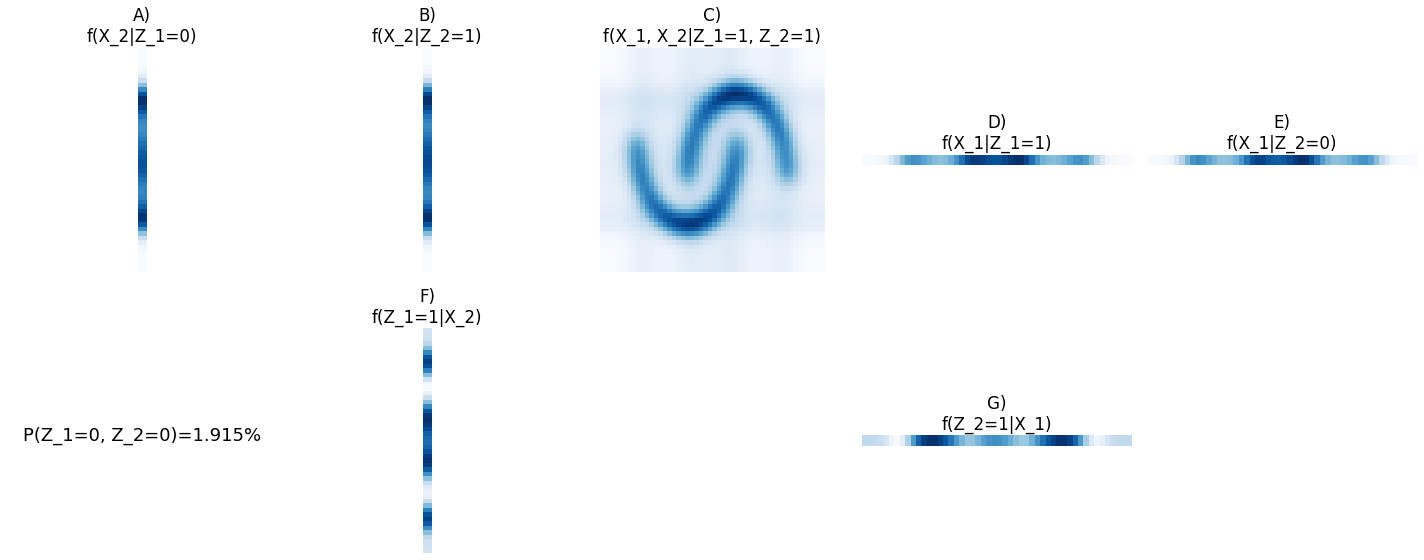

In [191]:
from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_0, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_1_marginal, hat_f_2_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=resolution, verbose=1)

0.09635266587483186

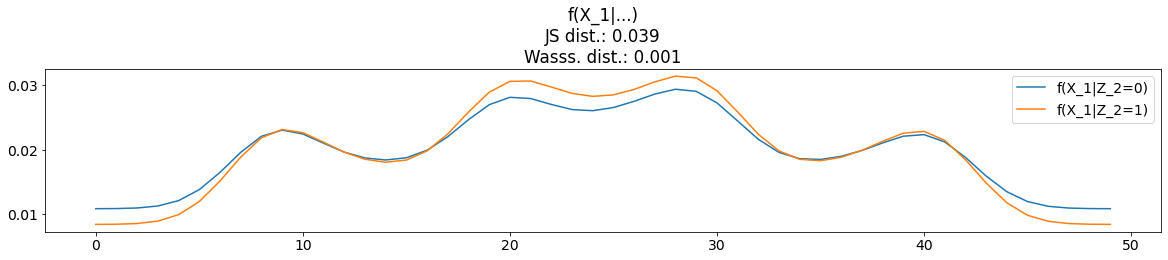

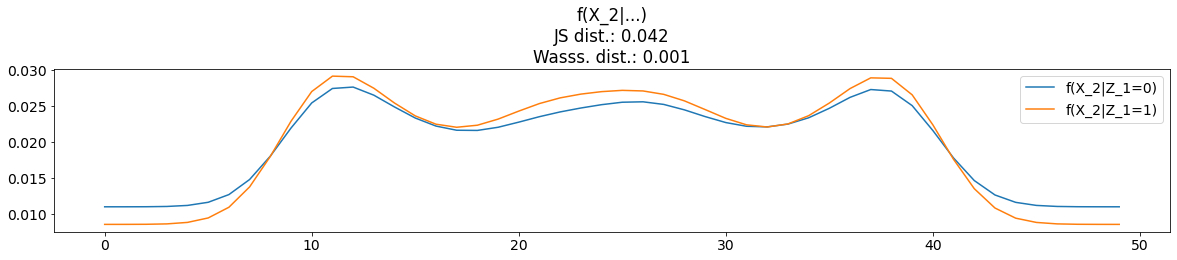

In [192]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.3f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

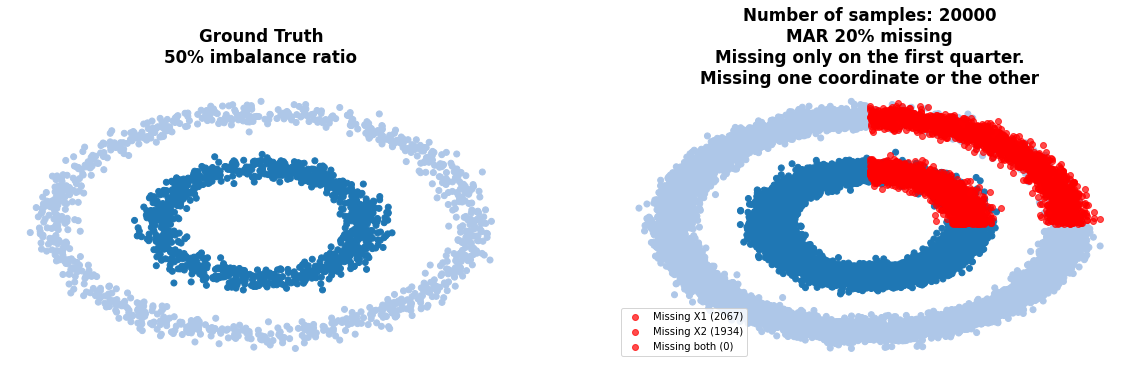

In [185]:
# (1) Create toy and ground truth data
dataset = DatasetGenerator(name='circles', 
                           num_samples=num_samples, 
                           ratio_of_missing_values=ratio_of_missing_values, 
                           imbalance_ratio=imbalance_ratio, 
                           num_samples_gt=2000, 
                           verbosity=1, 
                           random_state=105)

dataset.generate_missing_coordinates(missingness_mechanism='MAR', allow_missing_both_coordinates=False, missing_first_quarter=True, ratio_missing_per_class=[.1, .2])
X, X_gt, _, _ = dataset.get_data()

In [188]:
from stats import kernel_based_pdf_estimation_xz
hat_f, hat_f_0, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_1_marginal, hat_f_2_marginal = kernel_based_pdf_estimation_xz(X=X, h=h, resolution=resolution, verbose=1)

KeyboardInterrupt: 

In [ ]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 2)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_1_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_1_marginal)))
plt.legend()
fi(20, 2)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_2_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_2, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_2_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_1_marginal, 2.0)
distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)

0.03913923428174224

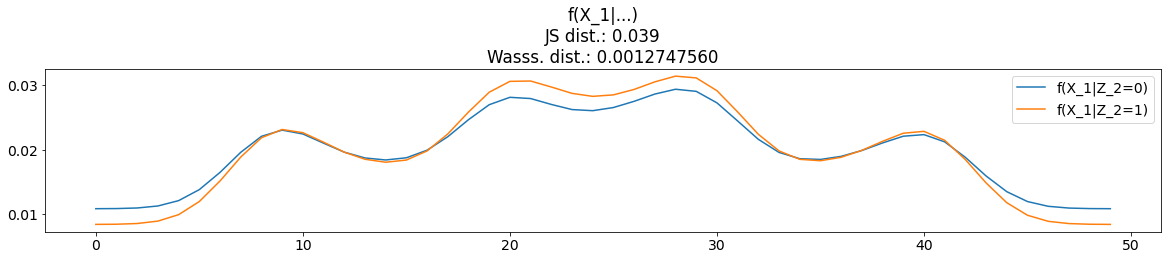

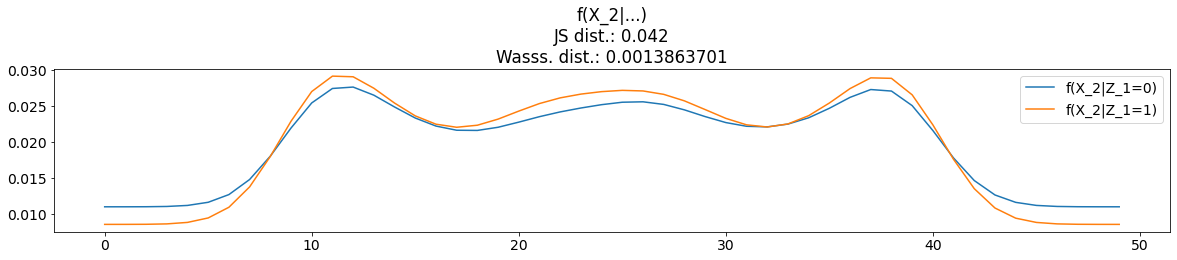

In [179]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

fi(20, 3)
plt.plot(hat_f_1, label='f(X_1|Z_2=0)')
plt.plot(hat_f_2_marginal, label='f(X_1|Z_2=1)')
plt.title("f(X_1|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0), wasserstein_distance(hat_f_1, hat_f_2_marginal)))
plt.legend()
fi(20, 3)
plt.plot(hat_f_2, label='f(X_2|Z_1=0)')
plt.plot(hat_f_1_marginal, label='f(X_2|Z_1=1)')
plt.title("f(X_2|...)\nJS dist.: {:.3f}\nWasss. dist.: {:.10f}".format(distance.jensenshannon(hat_f_2, hat_f_1_marginal, 2.0), wasserstein_distance(hat_f_2, hat_f_1_marginal)))
plt.legend()


distance.jensenshannon(hat_f_1, hat_f_2_marginal, 2.0)


# Dev functionnalities 

In [8]:
# Dataset default parameters
DATASET_NAME = 'circles'
NUM_SAMPLES = 1000
IMBALANCE_RATIO = .5

# Missingness default parameters
MISSINGNESS_PATTERN = 1
MAX_TRY_MISSSINGNESS = 100
RATIO_OF_MISSING_VALUES = .2
RATIO_MISSING_PER_CLASS = [.1, .3]

# pdf estimation default parameters
RESOLUTION = 20
BANDWIDTH = .2

# Classification default parameters
PROPORTION_TRAIN = .8

# Machine parameters
EPSILON = np.finfo(float).eps
RANDOM_STATE = 105

Doing experiment 4!


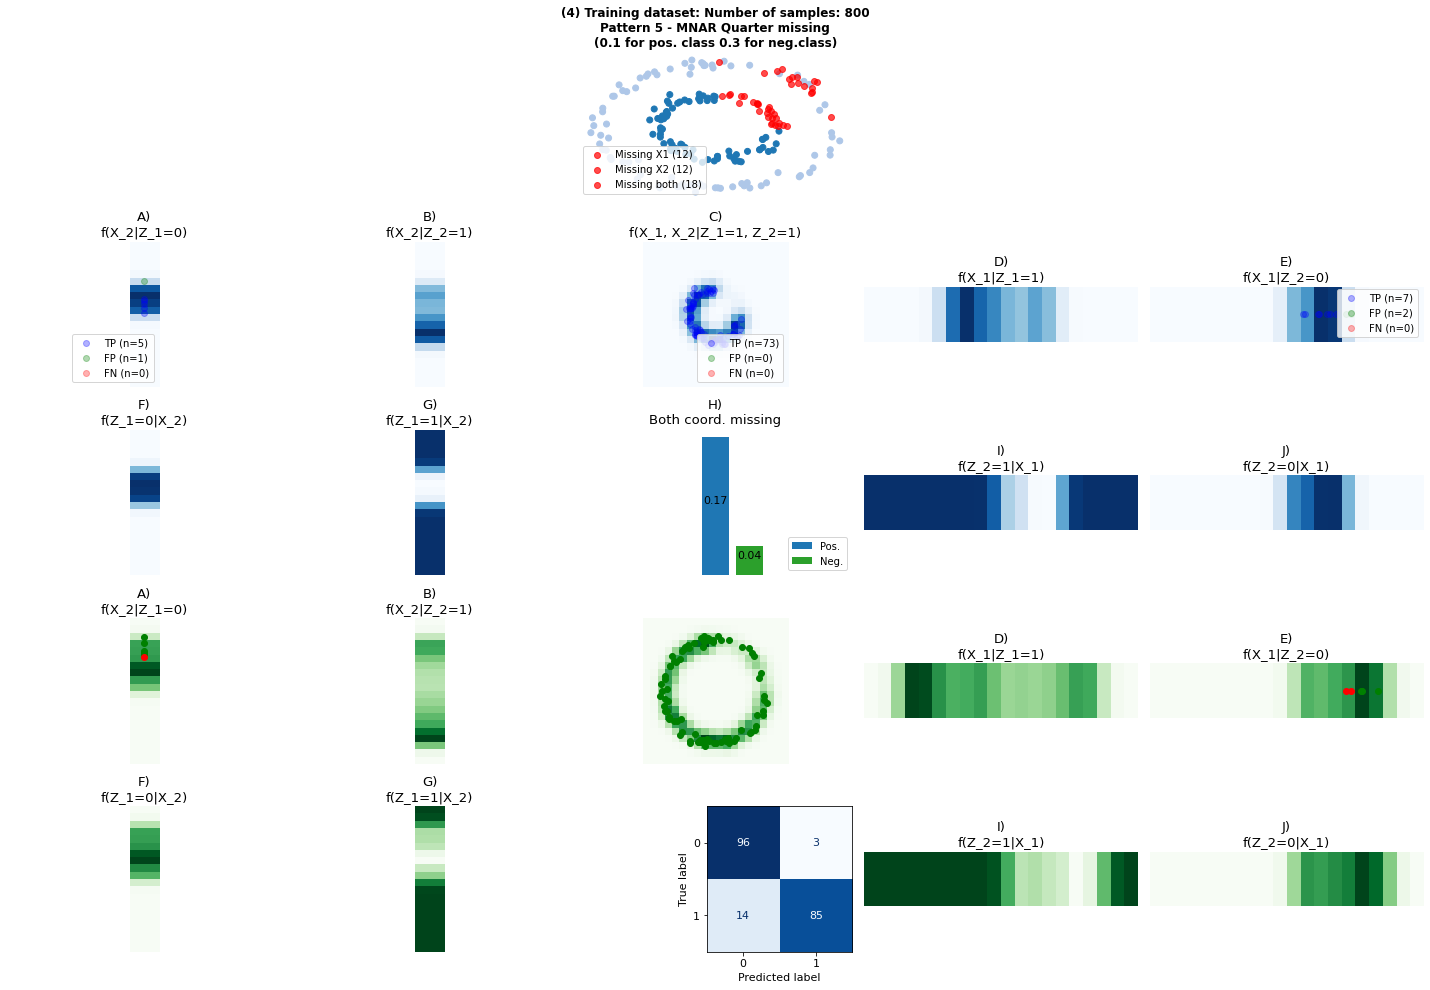

Sample: 99 positive and 99 negative samples (#p/#n=100%)



,0
Accuracy,0.914
F1 score (2 PPVxTPR/(PPV+TPR)),0.909
Matthews correlation coefficient (MCC),0.833
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.859
"Specificity, selectivity or true negative rate (TNR)",0.970
Precision or positive predictive value (PPV),0.966
Negative predictive value (NPV),0.873
Miss rate or false negative rate (FNR),0.141
False discovery rate (FDR=1-PPV),0.034
False omission rate (FOR=1-NPV),0.127


In [9]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = 5#MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN



verbosity=0

# Definition of the Train and Test datasets
proportion_train  = .8


dataset_train = DatasetGenerator(dataset_name=dataset_name, 
                                purpose='train',
                                num_samples=int(proportion_train*num_samples), 
                                ratio_of_missing_values=ratio_of_missing_values, 
                                imbalance_ratio=imbalance_ratio, 
                                verbosity=0)

dataset_test = DatasetGenerator(dataset_name=dataset_name, 
                                purpose='test',
                                num_samples=int((1-proportion_train)*num_samples), 
                                ratio_of_missing_values=ratio_of_missing_values, 
                                imbalance_ratio=imbalance_ratio, 
                                verbosity=0)


# Creation of the missingness
dataset_train.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)
dataset_test.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=dataset_train, 
                  dataset_test=dataset_test, 
                  previous_experiment=None, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

Experiment 1 loaded successfully! :-)


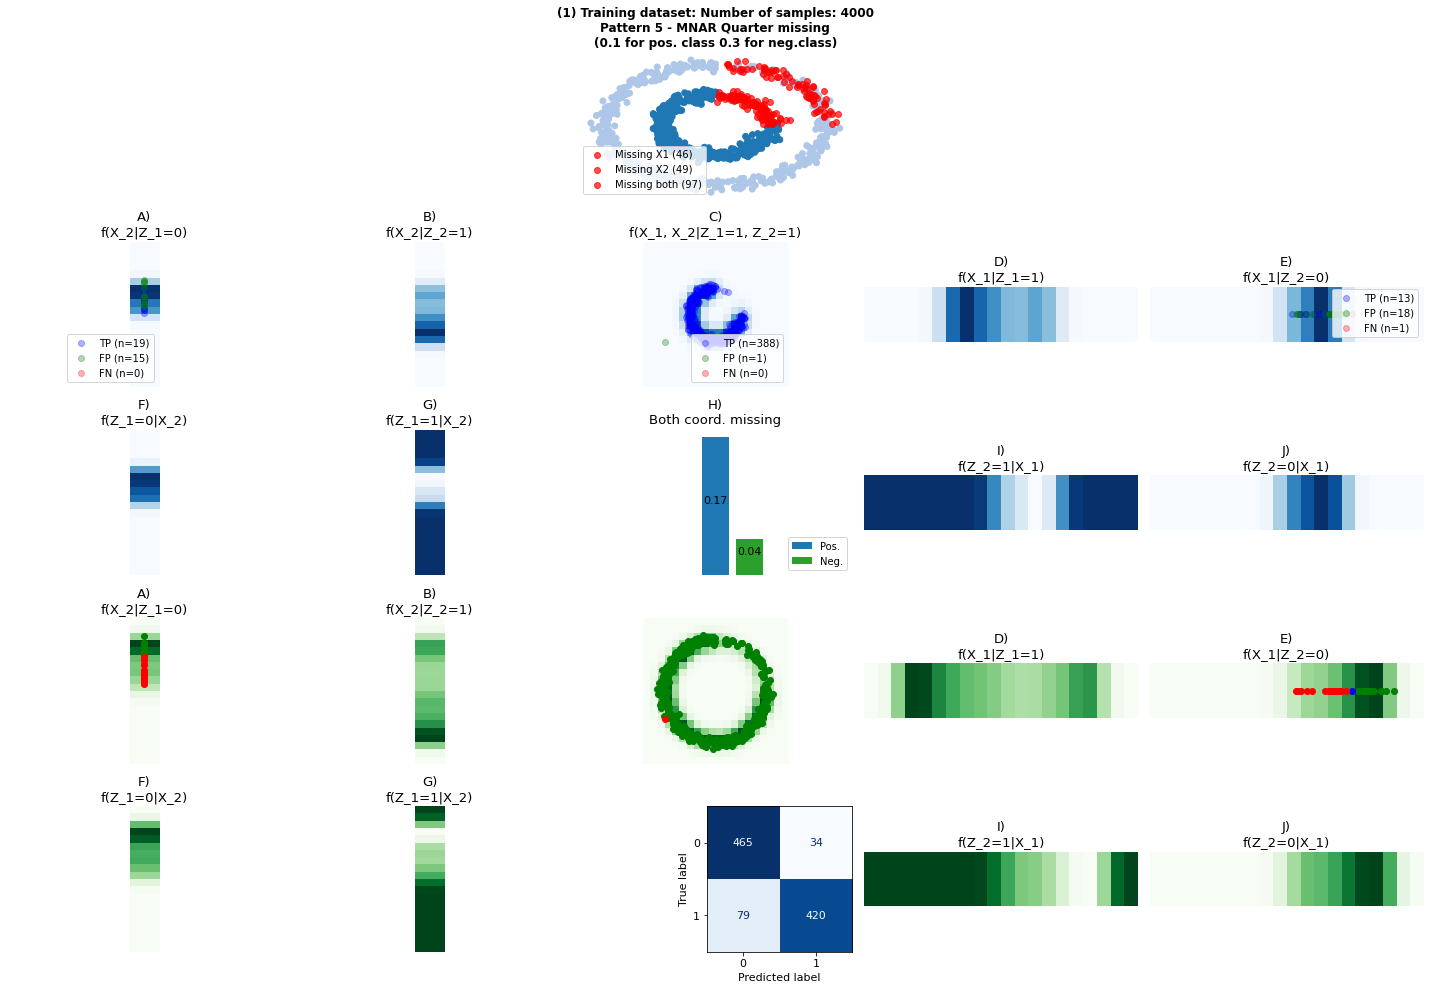

Sample: 499 positive and 499 negative samples (#p/#n=100%)



,0
Accuracy,0.887
F1 score (2 PPVxTPR/(PPV+TPR)),0.881
Matthews correlation coefficient (MCC),0.777
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.842
"Specificity, selectivity or true negative rate (TNR)",0.932
Precision or positive predictive value (PPV),0.925
Negative predictive value (NPV),0.855
Miss rate or false negative rate (FNR),0.158
False discovery rate (FDR=1-PPV),0.075
False omission rate (FOR=1-NPV),0.145


In [10]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = 5#MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN



verbosity=0

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  previous_experiment=1, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
#exp.fit()

# Estimate the distributions 
#exp.predict()

# Plot results
exp.plot()

# Dev computations  - Making sure of the h exponent 

Doing experiment 16!


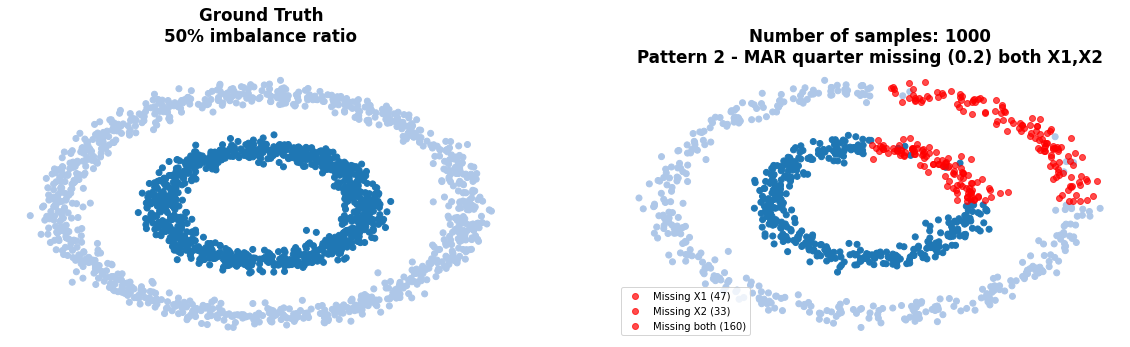

Computation time was 0h 0m and 0.44s


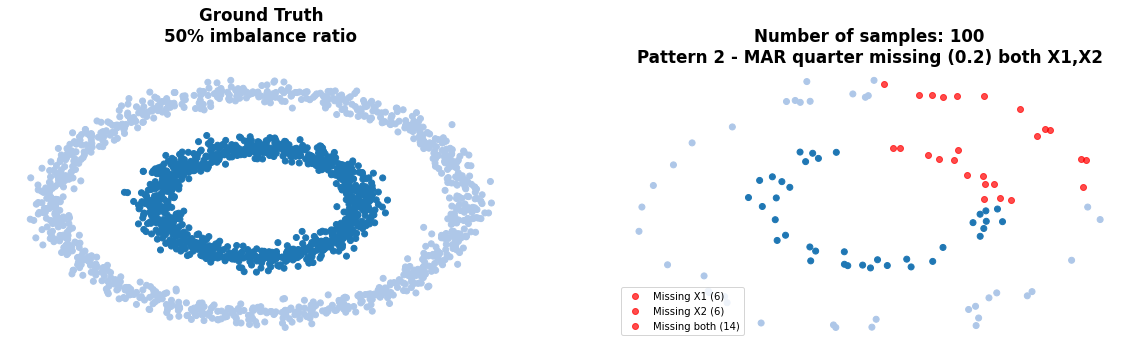

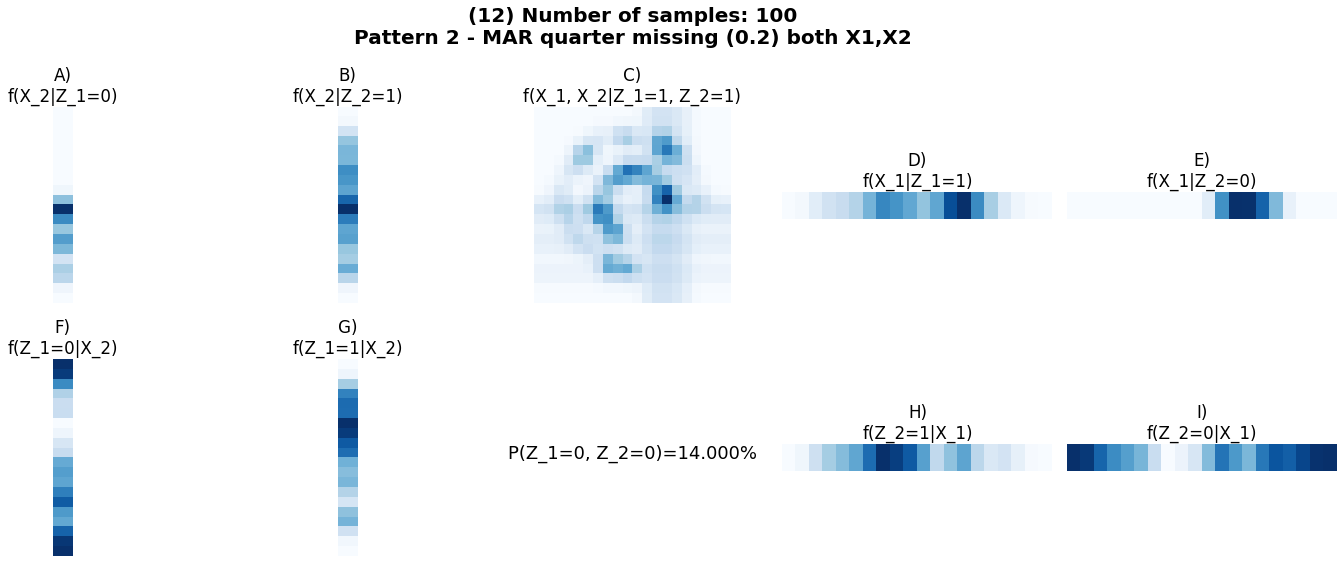

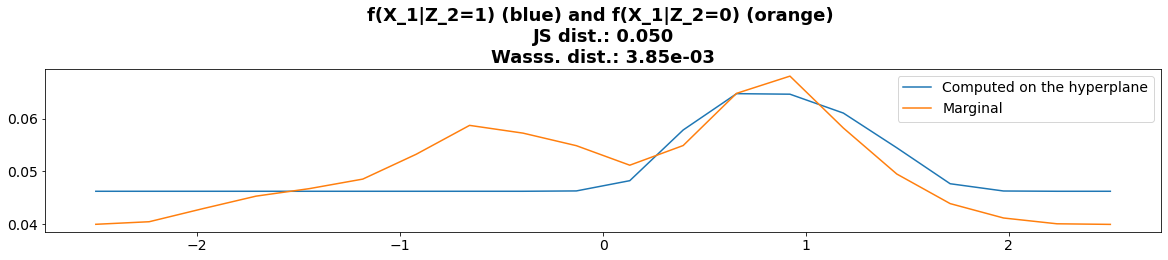

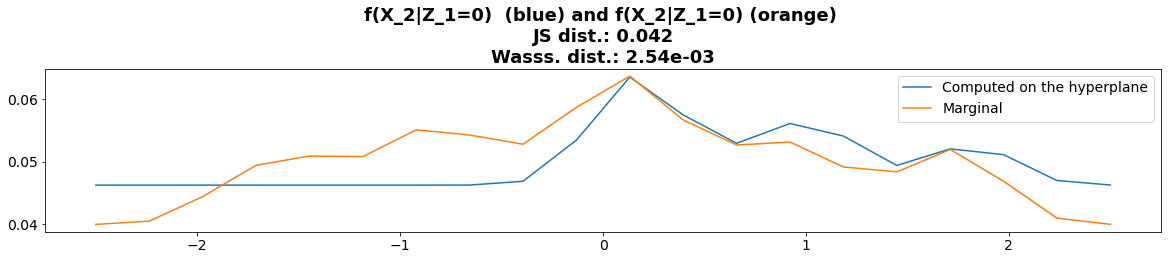

In [60]:
from experiments import Experiment

num_samples=1000
ratio_of_missing_values=.25
imbalance_ratio=.5
resolution=20
methods=["side_spaces"]
dataset_name = 'circles'
h = .2
random_state=105

dataset = DatasetGenerator(dataset_name=dataset_name, 
                            num_samples=num_samples, 
                            ratio_of_missing_values=ratio_of_missing_values, 
                            imbalance_ratio=imbalance_ratio, 
                            verbosity=0, 
                            random_state=random_state)

# Create an expe
exp = Experiment(dataset=dataset, 
                        previous_experiment=None,
                        create_experiment=True,
                        verbosity=1, 
                        random_state=47)

missingness_pattern = 2

# There are no mutual information between Z and X, Y
exp.dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=1)
# Estimate the pdf
experiment.estimate_pdf()

# Plot results
experiment.plot()

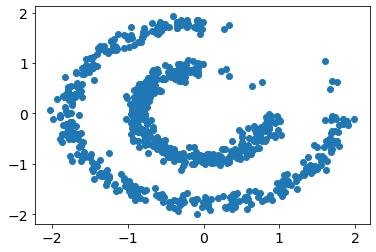

In [45]:
plt.scatter(exp.dataset.X[:,0], exp.dataset.X[:,1])

In [71]:
X = experiment.dataset.X



from utils import estimate_pdf
# Estimation of f(X_1,X_2|Z_1=1, Z_2=1), f(X_2|Z_1=0,Z_2=1) and f(X_1|Z_1=1,Z_2=0)
hat_f, hat_f_0, hat_f_1, hat_f_2 = estimate_pdf(data=X, method='side_spaces', resolution=resolution, bandwidth=h) 

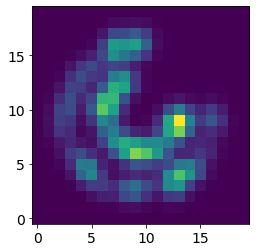

In [85]:
plt.imshow(hat_f, origin='lower')

In [69]:
from stats import f_xi_side_spaces

x=-1.3
y=1.3
# init 
hat_f = []
hat_f_0 = []
hat_f_1 = []  
hat_f_2 = []  

# Compute contribution of each samples to the estimation of the pdf at point x 
for X_i in X:
    contribution_f, contribution_f_0, contribution_f_1, contribution_f_2 = f_xi_side_spaces(X_i, [x,y], h)
    hat_f.append(contribution_f)
    hat_f_0.append(contribution_f_0)
    hat_f_1.append(contribution_f_1)
    hat_f_2.append(contribution_f_2)

hat_f = np.mean(np.array(hat_f))   
hat_f_0 = np.mean(np.array(hat_f_0))   
hat_f_1 = np.mean(np.array(hat_f_1))      
hat_f_2 = np.mean(np.array(hat_f_2))  

hat_f

0.18656151491072318

In [79]:
hat_f[15,15]

1.0908522274752304e-08

<AxesSubplot:>

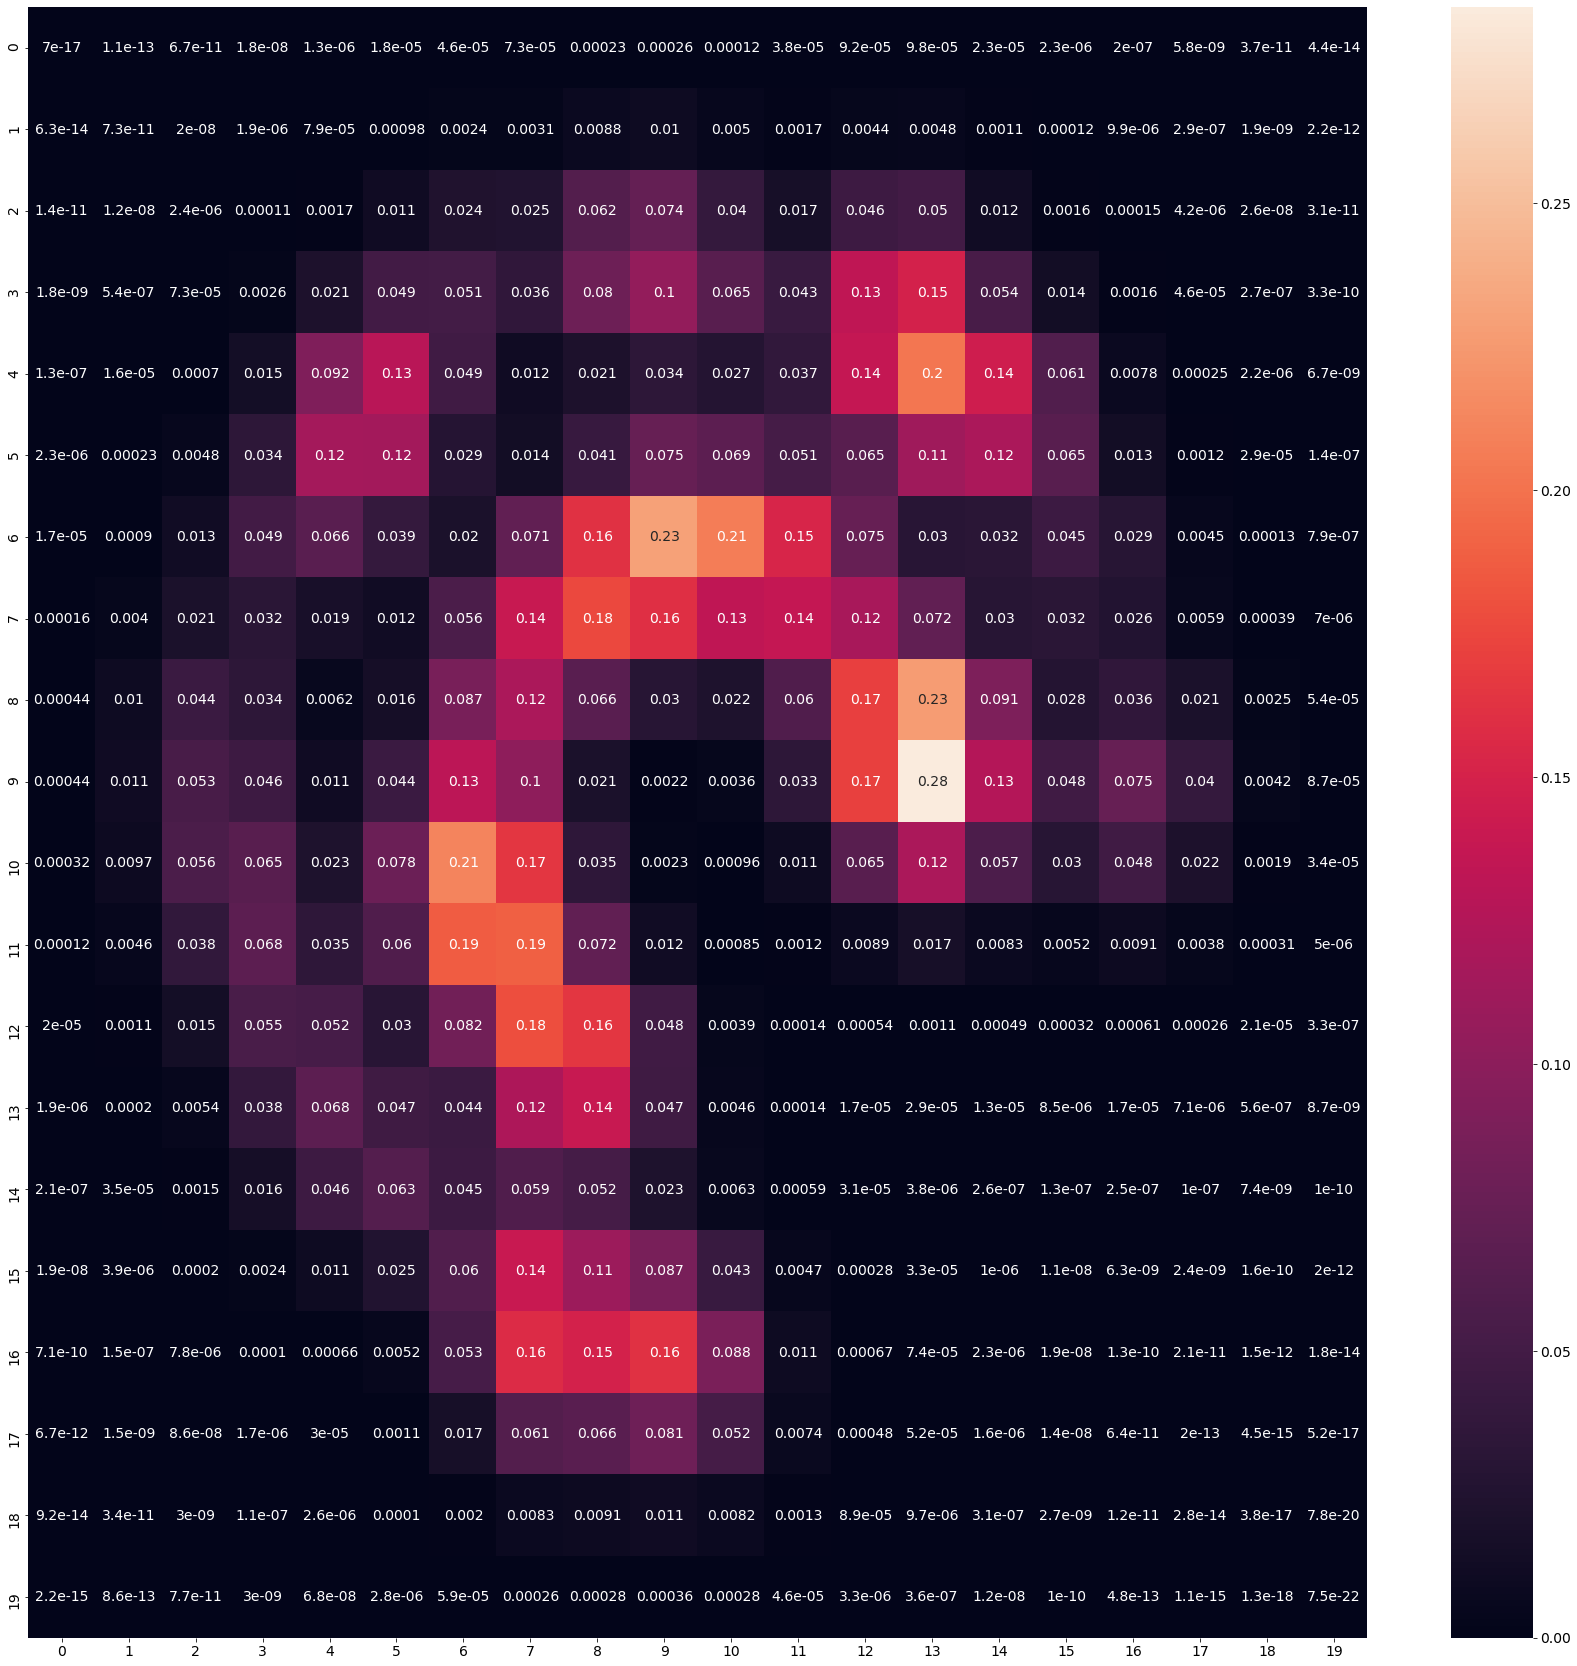

In [80]:
fi(30,30)
sns.heatmap(pd.DataFrame(hat_f), annot=True)

In [26]:
x = [1.2, 1.2]

X_i = np.array([1.3, np.nan])
X_i = np.array([1.3, 1.3])

      
k = X_i.shape[0]  # dimension of the space of samples. 
K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
# Define the switch function between coordinates. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
# The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
switch = lambda j: -j+1

# Since we are using a isomorph kernel, each axis can be handeled independently. 
hat_fi = 1
hat_fi_missing = [1, 1]
hat_fi_0 = 0

coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

# Handle the case where both are missing

if coords_missing.sum() == k:
    hat_fi_0 = 1 

else:
    for j in range(k):
        print('\n',j)
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            print('we know coord {}, it is {}'.format(j, X_i[j]))
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/bandwidth * K( (x[j]-X_i[j])/bandwidth )
            
            print("hat_fi = {} (mullt by {})".format(hat_fi, 1/bandwidth * K( (x[j]-X_i[j])/bandwidth )))
            hat_fi_missing[switch(j)] = 0
            print("Add to hat_fi_missing[{}] 0".format(switch(j)))

        else:  # we don't know the j-th coordinate, 
            print('we don t know coord {}'.format(j))
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/bandwidth * K( (x[switch(j)]-X_i[switch(j)])/bandwidth ) # To check
            print("Add to hat_fi_missing[{}] : ".format(switch(j)), 1/bandwidth * K( (x[switch(j)]-X_i[switch(j)])/bandwidth ))



 0
we know coord 0, it is 1.3
hat_fi = 1.7603266338214971 (mullt by 1.7603266338214971)
Add to hat_fi_missing[1] 0

 1
we know coord 1, it is 1.3
hat_fi = 3.098749857741323 (mullt by 1.7603266338214971)
Add to hat_fi_missing[0] 0


In [76]:
bandwidth = h
data = X
xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f = np.zeros_like(xygrid[0])  # init. the pdf estimation


method = 'our'

if method=='our':
    # See documentation
    from stats import kernel_based_pdf_estimation
    h = bandwidth
    for i in range(H):
        for j in range(W):
            x = xygrid[0][i,j]
            y = xygrid[1][i,j]
            hat_f[i,j] = kernel_based_pdf_estimation(data,x=[x,y],h=h)
elif method=='side_spaces':
    # See documentation
    from stats import kernel_based_pdf_estimation_side_spaces
    h = bandwidth
    hat_f_0 = np.zeros_like(xygrid[0])  # init. the pdf estimation
    hat_f_1 = np.zeros_like(xygrid[0])  # init. the pdf estimation
    hat_f_2 = np.zeros_like(xygrid[0])  # init. the pdf estimation

    for i in range(H):
        for j in range(W):
            x = xygrid[0][i,j]
            y = xygrid[1][i,j]
            # Computing contribution on coordinates i, j of hat_f, and coordinate i of hat_f_1 and coordinate j of hat_f_2
            hat_f[i,j], hat_f_0[i,j], hat_f_1[i,j], hat_f_2[i,j] =  kernel_based_pdf_estimation_side_spaces(X=data, x=[x,y], h=h)
            if x>0 and y>0:
                print("x={:.2f}, y={:.2f} : added {}".format(x, y, hat_f[i,j] ))

../tools/stats.py:525: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'f_xi'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../tools/stats.py", line 532:
@jit(nopython=True, parallel=True)
def f_xi(X_prior,X_i,x,h):
^

  hat_f.append(f_xi(X_prior,X_i,x,h))
/Users/samperochon/anaconda3/envs/combinations/lib/python3.7/site-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'F'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../tools/stats.py", line 519:
@jit(nopython=True, parallel=True)
def F(X=None, X_prior=None, x=None, h=1, verbo

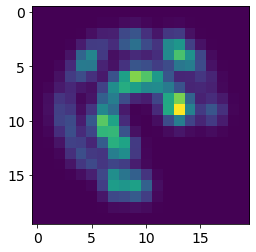

In [77]:
plt.imshow(hat_f)

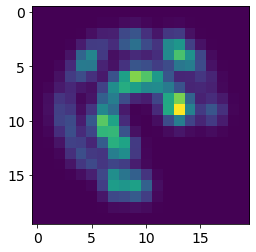

In [7]:
plt.imshow(hat_f)

In [ ]:
X_i = X[0]
x = [x, y]

In [ ]:
k = X_i.shape[0]  # dimension of the space of samples. 
K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
# Define the switch function between coordiantes. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
# The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
switch = lambda j: -j+1

# Since we are using a isomorph kernel, each axis can be handeled independently. 
hat_fi = 1
hat_fi_missing = [1, 1]
hat_fi_empty = 1

coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

# Handle the case where both are missing

if coords_missing.sum() == k:
    hat_fi_empty = 1 
    
else:

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/bandwidth * K( (x[j]-X_i[j])/bandwidth )
        if coords_missing[j]:  # we don't know the j-th coordinate, 
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/bandwidth * K( (x[switch(j)]-X_i[switch(j)])/bandwidth ) # To check

hat_fi, hat_fi_empty, hat_fi_missing[0], hat_fi_missing[1]

(1.5196583098531924e-16, 1, 1.5196583098531924e-16)

In [126]:
coords_missing.sum() == k

1

In [127]:
k

2

In [ ]:
# Normalization of the distributions
hat_f /= hat_f.sum();hat_f_1 /= hat_f_1.sum();hat_f_2 /= hat_f_2.sum()

# Computation of the marginals
hat_f_1_marginal = hat_f.sum(axis=1);hat_f_2_marginal = hat_f.sum(axis=0)

# Z_prior reflects P(Z_1=1, Z_2=1, ... Z_k=1)
Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])

# Estimation of f(Z_1=1|X_2)
#hat_f_z1_knowing_x2 = hat_f_2 * (1-Z_prior[0])/(hat_f_2*(1-Z_prior[0]) + hat_f_2_marginal*Z_prior[0])
#hat_f_z1_knowing_x2 /= hat_f_z1_knowing_x2.sum()

# Estimation of f(Z_1=0|X_2)
hat_f_z1 = hat_f_2_marginal * Z_prior[0]/(hat_f_2_marginal*Z_prior[0] + hat_f_2*(1-Z_prior[0]))
hat_f_z1 /= hat_f_z1.sum()

# Estimation of f(Z_2=1|X_1)
#hat_f_z2_knowing_x1 = hat_f_1 * (1-Z_prior[1])/(hat_f_1*(1-Z_prior[1]) + hat_f_1_marginal*Z_prior[1])
#hat_f_z2_knowing_x1 /= hat_f_z2_knowing_x1.sum()

# Estimation of f(Z_2=0|X_1)
hat_f_z2 = hat_f_1_marginal * Z_prior[1]/(hat_f_1_marginal*Z_prior[1] + hat_f_1*(1-Z_prior[1]))
hat_f_z2 /= hat_f_z2.sum()

In [201]:
def kernel_based_pdf_estimation_xz(X, h=.2, resolution=50, cmap='Blues', verbose=0):
    
    from utils import estimate_pdf

    # Estimation of f(X_1,X_2|Z_1=1, Z_2=1), f(X_2|Z_1=0,Z_2=1) and f(X_1|Z_1=1,Z_2=0)
    hat_f, hat_f_1, hat_f_2 = estimate_pdf(data=X, method='side_spaces', resolution=resolution, bandwidth=h) 
    
    # Normalization of the distributions
    hat_f /= hat_f.sum();hat_f_1 /= hat_f_1.sum();hat_f_2 /= hat_f_2.sum()
    
    # Computation of the marginals
    hat_f_1_marginal = hat_f.sum(axis=1);hat_f_2_marginal = hat_f.sum(axis=0)
    
    # Z_prior reflects P(Z_1=1, Z_2=1, ... Z_k=1)
    Z_prior = np.array([np.mean(~np.isnan(X[:,i])) for i in range(X.shape[1])])

    # Estimation of f(Z_1=1|X_2)
    #hat_f_z1_knowing_x2 = hat_f_2 * (1-Z_prior[0])/(hat_f_2*(1-Z_prior[0]) + hat_f_2_marginal*Z_prior[0])
    #hat_f_z1_knowing_x2 /= hat_f_z1_knowing_x2.sum()
    
    # Estimation of f(Z_1=0|X_2)
    hat_f_z1 = hat_f_2_marginal * Z_prior[0]/(hat_f_2_marginal*Z_prior[0] + hat_f_2*(1-Z_prior[0]))
    hat_f_z1 /= hat_f_z1.sum()
    
    # Estimation of f(Z_2=1|X_1)
    #hat_f_z2_knowing_x1 = hat_f_1 * (1-Z_prior[1])/(hat_f_1*(1-Z_prior[1]) + hat_f_1_marginal*Z_prior[1])
    #hat_f_z2_knowing_x1 /= hat_f_z2_knowing_x1.sum()
    
    # Estimation of f(Z_2=0|X_1)
    hat_f_z2 = hat_f_1_marginal * Z_prior[1]/(hat_f_1_marginal*Z_prior[1] + hat_f_1*(1-Z_prior[1]))
    hat_f_z2 /= hat_f_z2.sum()


    if verbose:

        fig, axes = plt.subplots(2, 5, figsize=(20, 8));axes = axes.flatten()
        axes[0].imshow(hat_f_2[:,None].repeat(2, axis=1), cmap=cmap);axes[0].set_title("A)\nf(X_2|Z_1=0)")
        axes[1].imshow(hat_f_2_marginal[:,None].repeat(2, axis=1), cmap=cmap);axes[1].set_title("B)\nf(X_2|Z_2=1)")
        axes[2].imshow(hat_f, cmap=cmap);axes[2].set_title("C)\nf(X_1, X_2|Z_1=1, Z_2=1)")
        axes[3].imshow(hat_f_1_marginal[None, :].repeat(2, axis=0), cmap=cmap);axes[3].set_title("D)\nf(X_1|Z_1=1)")
        axes[4].imshow(hat_f_1[None, :].repeat(2, axis=0), cmap=cmap);axes[4].set_title("E)\nf(X_1|Z_2=0)")
        
        #axes[5].imshow(hat_f_z1_knowing_x2[:,None].repeat(2, axis=1));axes[5].set_title("f(Z_1=0|X_2)")
        axes[6].imshow(hat_f_z1[:,None].repeat(2, axis=1), cmap=cmap);axes[6].set_title("F)\nf(Z_1=1|X_2)")
        axes[8].imshow(hat_f_z2[None, :].repeat(2, axis=0), cmap=cmap);axes[8].set_title("G)\nf(Z_2=1|X_1)")
        #axes[9].imshow(hat_f_z2_knowing_x1[None, :].repeat(2, axis=0));axes[9].set_title("f(Z_2=0|X_1)")
        
        _ = [ax.axis('off') for ax in axes]; plt.tight_layout()
        
    return hat_f, hat_f_1, hat_f_2, hat_f_z1, hat_f_z2, hat_f_2_marginal, hat_f_1_marginal


##############################################################################
####### Kernel_based_pdf_estimation using the side spaces            #########
##############################################################################


def kernel_based_pdf_estimation_side_spaces(X, x=None, h=.2, verbose=0):
    """
    Estimate the pdf distribution of "X" at "x" using the set of observations X[i,:]. x has lenght k (the dimension of the problem), X has shape nxk (n observations of dimension k). 
    X can have missing values which should be filled with np.nan. A Kernel approximation is computed when the coordinates of the observations are know. 
    If a coordinate is unknown, the contribution of this term is replaced by a prior on the missingness distribution of that coordinate, computed from all the other samples. *The contribution is limited to the range of values, based on the rest of the dataset.*
    
    Example: 
    X = np.random.random((10,3))  # 10 Observations of a 3d problem
    X[0,1] = np.nan; X[4,2] = np.nan  # We don't know some entries. 
    h = .1  # bandwidth of the gaussian kernel
    x = [0.1, 0.1, 0.1]  # where we want to evaluate the pdf (in the 3d space)
    pdf_x = kernel_based_pdf_estimation_z_prior_limited_range(X,x=x,h=h,verbose=0)
    print('The prob at {} is {}.format(x,pdf_x))

    """

    hat_f, hat_f_1, hat_f_2 = F_side_spaces(X=X, x=x, h=h)
    return hat_f, hat_f_1, hat_f_2


#@jit(nopython=True, parallel=True)
def F_side_spaces(X=None, x=None, h=.2, verbose=0):
    """
    Computation of the pdf at x, using the prior on the missingness meachanism of each features. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    # number "training" samples 
    n = X.shape[0]      

    # init 
    hat_f = []
    hat_f_1 = []  
    hat_f_2 = []  

    # Compute contribution of each samples to the estimation of the pdf at point x 
    for X_i in X:
        contribution_f, contribution_f_1, contribution_f_2 = f_xi_side_spaces(X_i, x, h)
        hat_f.append(contribution_f)
        hat_f_1.append(contribution_f_1)
        hat_f_2.append(contribution_f_2)

    hat_f = np.mean(np.array(hat_f))      
    hat_f_1 = np.mean(np.array(hat_f_1))      
    hat_f_2 = np.mean(np.array(hat_f_2))      
    return hat_f, hat_f_1, hat_f_2

#@jit(nopython=True, parallel=True)
def f_xi_side_spaces(X_i, x, h):
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    Z_priors contains the empirical probability that feature j/k is missing, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = X_i.shape[0]  # dimension of the space of samples. 
    K = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-u**2 / 2)  # Define the kernel
    # Define the switch function between coordiantes. It is needed as if X1 is missing, we need to build the distribution of x_2 knowing xi is missing, so the other line...
    # The switch function in general should send 0 to 1 and 1 to 0 in 2D. In 3D, 0 should be sent to [1,2], 1 to [0,2] and 2 to [0,1].
    switch = lambda j: -j+1

    # Since we are using a isomorph kernel, each axis can be handeled independently. 
    hat_fi = 1
    hat_fi_missing = [1, 1]

    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i

    for j in range(k):
        if not coords_missing[j]: # we know the j-th coordinate of X_i 
            # We can compute the contribution of the jth coordinate using the standard term
            hat_fi *= 1/h * K( (x[j]-X_i[j])/h )
        if coords_missing[j]:  # we don't know the j-th coordinate, 
            # We use prior on the missingness mechanism associated to this coordinates.
            hat_fi_missing[switch(j)] *= 1/h * K( (x[switch(j)]-X_i[switch(j)])/h ) # To check

    return hat_fi, hat_fi_missing[0], hat_fi_missing[1]


# TODO

* Use classifier on X, and Z !!!
* Show results

In [ ]:
from operator import le
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import os
import plotly.express as px

class model(BaseEstimator, ClassifierMixin):
    """Wrap sklearn models into my own estimator, this allows my to handle some upsampling and custom operations in a more compact fashion. 
    """
    def __init__(self, method, name='ClassifierName', **kwargs):
        
        self.name = name
        self.force_all_finite = True
        self.sampling_method = 'smote'

        # Depending on the method selected, init the proper sklearn model
        if method == "knn":  # use k-nearest neighbor
            from sklearn.neighbors import KNeighborsClassifier
            self.model =  KNeighborsClassifier(n_neighbors=40, weights='uniform', **kwargs)

        if method == "lg":  # use logistic regresion
            from sklearn.linear_model import LogisticRegression
            self.model = LogisticRegression(**kwargs)

        if method == 'nb': 
            from sklearn.naive_bayes import GaussianNB
            self.model = GaussianNB(**kwargs)
            
        if method == 'xgboost':
            from xgboost import XGBClassifier
            self.model = XGBClassifier(use_label_encoder=False,
                                      learning_rate=0.01,
                                      verbosity=1,
                                      objective='binary:logistic',
                                      eval_metric='auc',
                                      booster='gbtree',
                                      tree_method='exact',
                                      subsample=1,
                                      colsample_bylevel=.8,
                                      alpha=0, 
                                      **kwargs)
            self.force_all_finite = False
            self.sampling_method = 'vanilla'

    def fit(self, X, y, balanced=True, **kwargs):
        """
        Train the model using X (n_samples, n_features) matrix, for the two classes
        problem. To work with imbalanced probels, balanced=True can be set, which 
        oversamples the minority class (assumed to be the positive class y=1), to 
        much the number of samples in the majority class (assumed to be the negative
        class, i.e., y=0). You can set "model_id" parameters to set where tensorboard
        logs are saved, which is useful to visualize training. 
        """

        if self.force_all_finite:
            X_filled = X.copy()
            X_filled[np.isnan(X_filled)] = -1
        else:
            X_filled = X


        
        # Check that X and y have correct shape
        X, y = check_X_y(X_filled, y, force_all_finite=self.force_all_finite)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        """
        Normalize the data and store the normalization parameters. 
        """
        from sklearn import preprocessing
        self.scaler = preprocessing.StandardScaler()
        self.scaler.fit(X_filled)  # fit scaler
        X_filled = self.scaler.transform(X_filled) # normalize the training data. 

        """
        Oversample the minority class
        """
        if balanced:
            X_filled,y = upsample_minority(X_filled,y,method=self.sampling_method)
        #ratio_train = float(np.sum(y == 0)) / np.sum(y==1)
        #print("Ratio after upsampling minority class: {}".format(ratio_train))

        """
        Fit
        """
        self.model.fit(X_filled, y, **kwargs)        
        return self
    
    def predict_proba(self, X):
        # Predict the classification score (associated with the class==1)
        X = self.scaler.transform(X)  # normalized input

        # Fill the values with -1 in case of algorithm not robust to missing data
        if self.force_all_finite:
            X_filled = X.copy()
            X_filled[np.isnan(X_filled)] = -1
        else:
            X_filled = X
        y_score = self.model.predict_proba(X_filled)[:,1]  
        return y_score
    
    def predict(self, X, th=.5):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        # Normalize the sample to match the pre-processing done at training        
        y_score = self.predict_proba(X)  # predict 
        y_pred = [1 if yy>=th else 0 for yy in y_score]
        return y_pred

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)


**Conclusion on the method:**
    
    1) TODO

#### Functions

In [200]:
def my_classification_report(y_true, y_pred):
    """
    Print several performance metrics that are common in the context of screening and fraud detection.
    """    

    """
    First compute the TP, FP, TN and FN from which most metrics derive
    """
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    """
    Compute metrics of interest  
    """    
    print('Sample: {} positive and {} negative samples (#p/#n={:3.0f}%)'.format(tp+fn, tn+fp, 100*(tp+fn)/(tn+fp)))
    acc = (tp + tn) / (tp + tn + fp +  fn)
    print('Accuracy: {:3.1f}%'.format(100*acc))
    f1 = 2*tp / (2*tp + fp + fn)
    print('F1 score (2 PPVxTPR/(PPV+TPR)): {:3.1f}%'.format(100*f1))
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('Matthews correlation coefficient (MCC): {:3.1f}%'.format(100*mcc))
    tpr =  tp / (tp+fn)
    print('Sensitivity, recall, hit rate, or true positive rate (TPR): {:3.1f}%'.format(100*tpr))
    tnr = tn / (tn+fp)
    print('Specificity, selectivity or true negative rate (TNR): {:3.1f}%'.format(100*tnr))
    ppv = tp / (tp+fp)
    print('Precision or positive predictive value (PPV): {:3.1f}%'.format(100*ppv))
    npv = tn / (tn+fn)
    print('Negative predictive value (NPV): {:3.1f}%'.format(100*npv))
    fnr = fn / (tp+fn)
    print('Miss rate or false negative rate (FNR): {:3.1f}%'.format(100*fnr))
    print('False discovery rate (FDR=1-PPV): {:3.1f}%'.format(100*(1-ppv)))
    print('False omission rate (FOR=1-NPV): {:3.1f}%'.format(100*(1-npv)))
    cm = confusion_matrix(Y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.im_.colorbar.remove()
    plt.show()
    return 


## Remaining questions

- How to build a confidece interval for the estimation, potentially using the missing data ? (The more data the higher the confidence) 
- How to be able to characterize easily the missingness mechanism at stake ? 

hat_f_z is of dimention (20, 20)
hat_f_z_1 is of dimention (20, 1)
hat_f_z_2 is of dimention (1, 20)


NameError: name 'data' is not defined

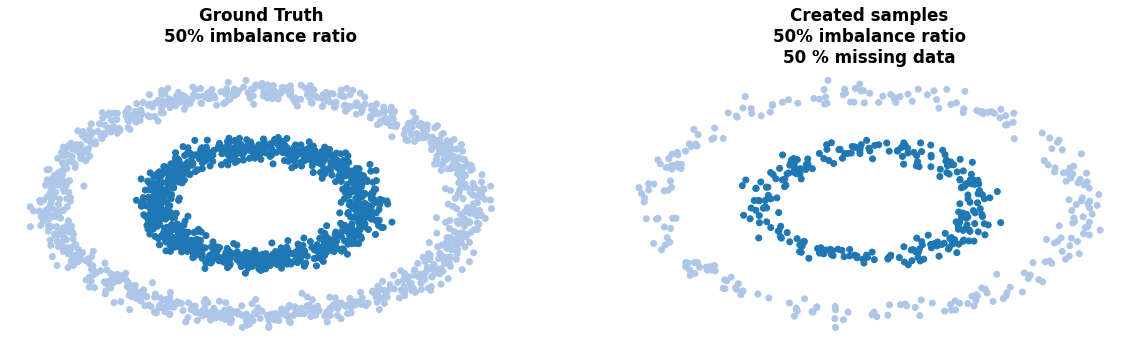

In [158]:
kernel_bandwidth=.2
num_samples=1000
ratio_of_missing_values=.5
imbalance_ratio=.5
resolution=50
dataset = 'moon'
from utils import estimate_pdf
methods=["side_spaces"]
dataset = 'circles'



h = kernel_bandwidth

# (1) Create toy and ground truth data
X, Xgt, _, _ = create_dataset(name=dataset, 
                                  num_samples=num_samples, 
                                  ratio_of_missing_values=ratio_of_missing_values, #
                                  imbalance_ratio=imbalance_ratio,
                                  provide_labels=True, 
                                  verbose=True)
resolution=20
bandwidth=.2

xygrid = np.meshgrid(np.linspace(-2.5,2.5,resolution),np.linspace(-2.5,2.5,resolution))
H,W = xygrid[0].shape
hat_f_z = np.zeros_like(xygrid[0])  # init. the pdf estimation
hat_f_z_1 = np.zeros((xygrid[0].shape[0], 1))  # init. the pdf estimation
hat_f_z_2 = np.zeros((1, xygrid[0].shape[0]))  # init. the pdf estimation

print("hat_f_z is of dimention {}".format(hat_f_z.shape))
print("hat_f_z_1 is of dimention {}".format(hat_f_z_1.shape))
print("hat_f_z_2 is of dimention {}".format(hat_f_z_2.shape))

for i in range(H):
    for j in range(W):
        x = xygrid[0][i,j]
        y = xygrid[1][i,j]
        hat_f_z[i,j], hat_f_z_1[i,j], hat_f_z_2[i,j] =  kernel_based_pdf_estimation_side_spaces_z(X=X, x=[x,y], h=h)

# Average the contribution of all j's coordinate on this horizontal line
hat_f_z_1 = np.mean(hat_f_z_1, axis=0)

# Average the contribution of all i's coordinate to form the vertical line
hat_f_2 = np.mean(hat_f_z_2, axis=1)   



# Suite

- https://github.com/ResidentMario/missingno 


### What if the prediction sample has missing values?

We focus previously on dealing with missing values on the data available to estimate the pdf ($X_i$). Sometimes, we want to estimate the probability of an observed sample with values $u$, but some of the coordinates could be missing. Think for example, that you have the PDF to estimate the probability of the salary of a person based on their educations, years of experience, and age; but for some reason, the age is missing. 

As in {eq}`eq:kernel_estimation_mdim2` we use the $j$ subindex to denote the coordinate, $u=\{u_j\}$ with $j=1,...,k$ (as before, we are working on a $k$-dimensional feature space). Let us define the set $N = [j_1, ..., j_p]$ the set of coordinates for which $u$ is known. When we know all the coordinates, we are essentially estimating the density distribution associated with a point in the k-dimensional feature space. If we don't know one axis, we can think as estimating the density along a line (associated to all the point that share the known axis). If we don't know two coordinates we are estimating the density associated with a 2D plane and so on. In general, the density associated with the hyperplane of unknown coordinates can be estimated as:

$$
\hat{f}_N(u) = \int_{u_j j\notin N} \hat{f}(u) =  \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u).
$$(eq:kernel_estimation_missing_values)

Using the definition $f_{ij}(u)$ introduces in {eq}`eq:fij_unknown_j`, and standard properties of calculus, we have, 
 
$$
\hat{f}_N(u) = \int_{u_j j\notin N} \frac 1 n \sum_i \prod_j f_{ij}(u) = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u) \prod_{j \notin N} \int_{-\infty}^{+\infty} \frac{1}{h\sqrt{2\pi}} e^{-\frac{1}{2 h^2} (u_j-X_{ij})^2} du_{j} = \frac 1 n \sum_i \prod_{j \in N} f_{ij}(u). $$(eq:kernel_estimation_missing_values2)

Equation {eq}`eq:kernel_estimation_missing_values2` proves that restricting the prediction to a subset of features, is as simple as computing the pdf restricting the training data to only those known features. As we show, the mathetical interpretation is that we will be estimating the density in a hyperplance of the feature space rather than a single point. 

# Estimation of Q

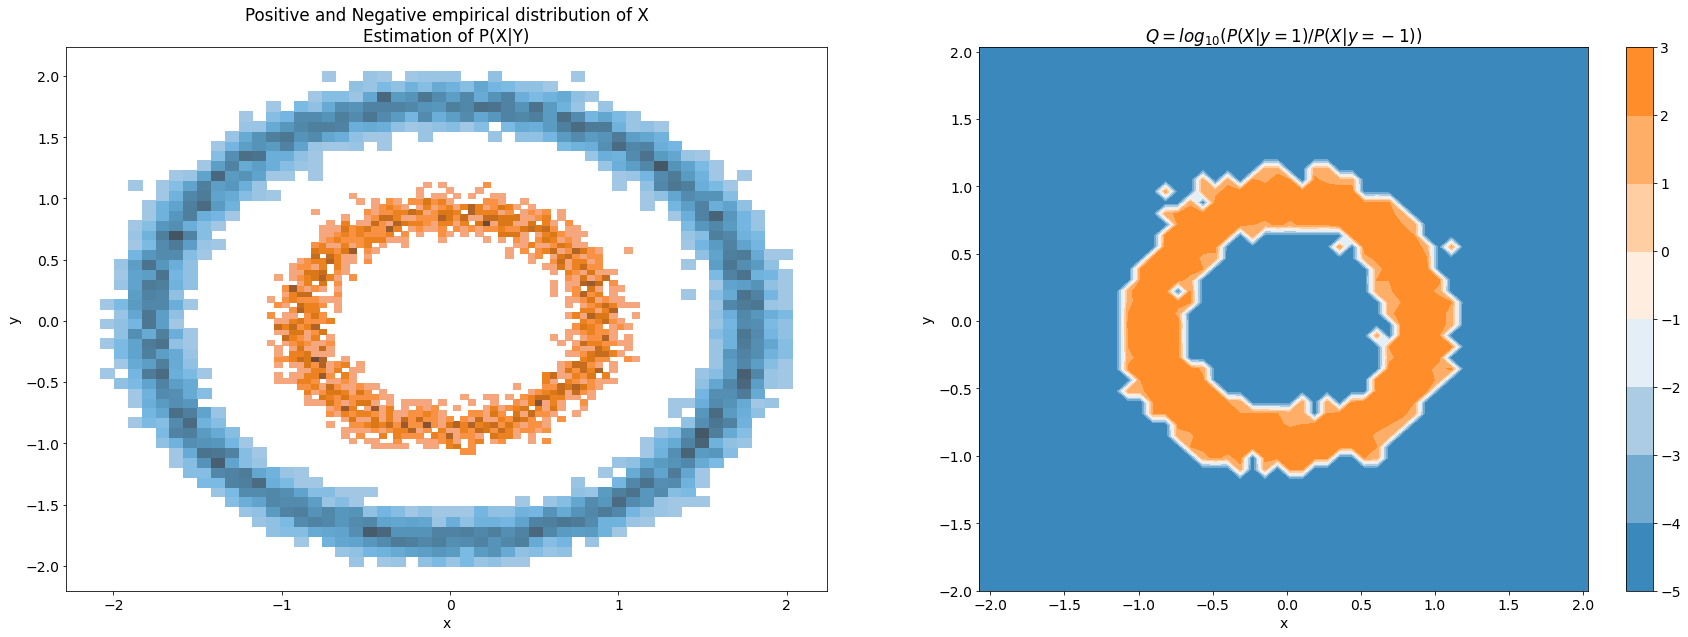

In [4]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="circles", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0,#ratio_of_missing_values, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)

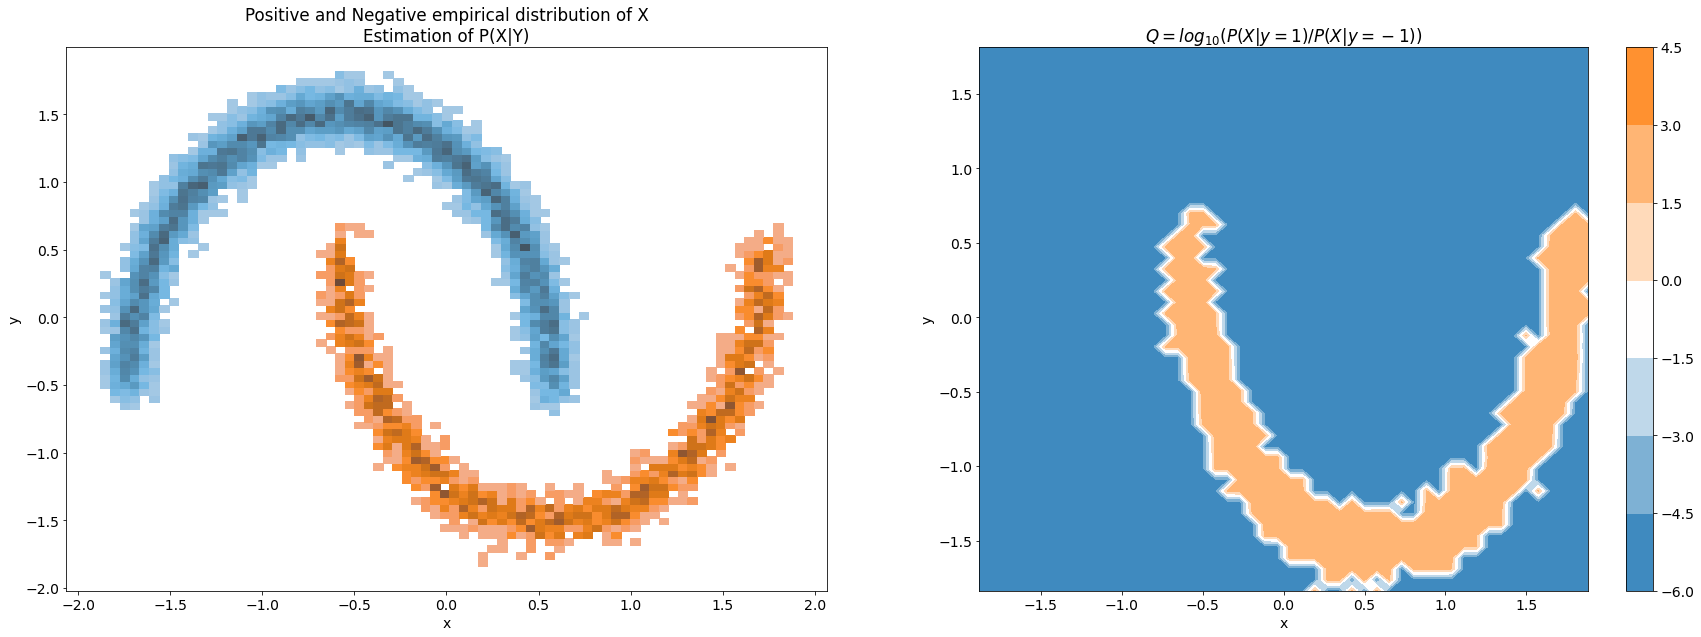

In [5]:
from stats import feature_values_positive_to_negative_ratio
X, Xgt, Y, Ygt = create_dataset(name="moons", 
                                          num_samples=10000, 
                                          ratio_of_missing_values=0, 
                                          imbalance_ratio=imbalance_ratio,
                                          provide_labels=True, 
                                          verbose=False)
Xp = X[np.argwhere(Y==1).squeeze()]; Xn = X[np.argwhere(Y==0).squeeze()]
Q = feature_values_positive_to_negative_ratio(Xp=Xp, Xn=Xn, num_bins=50)